# Sriram et al. (2012) Model Code

# Table of Contents
1. [Instructions](#instructions)
    1. [Parameter Optimization Against TSST Data Sets](#TSSTInstructions)
    2. [Parameter Optimization Against Basal Data Sets](#basalInstructions)
    3. [Running Without Parameter Optimization](#noOptInstructions)
2. [Imports](#imports)
3. [Parameters and Initial Conditions](#params)
4. [Put Raw Data into Arrays](#rawdata)
    1. [Plot Basal Data Sets](#plotBasalData)
    2. [Plot Nelson Data Sets](#plotNelsonData)
5. [Model Function--Includes ODE Solver](#modelfunction)
6. [Functions to Determine Delayed ACTH and Cortisol Values](#delays)
7. [Cost Function Definition](#cost)
8. [Run the Optimization](#run)
9. [Save Output to File](#saveoutput)
10. [Compute Means and Std Devations of Parameters and Output as Table](#paramtable)
11. [Plots](#plots)
12. [Figure 3 Reproduction](#fig3)
13. [Figure 4 Reproduction](#fig4)
14. [Load Parameter Sets, Run Model and Save Hormone Concentration Data](#loadparams)
15. [Checking Parameter Sets Generated Externally](#checkexternal)
16. [Load Simulated Concentration Data from Files and Plot](#load-and-plot)
17. [Dependencies](#dependencies)

## Instructions <a name="instructions"></a>

### Parameter Optimization Against TSST Data Sets <a name="TSSTInstructions" />

**Note:** To quickly run a cell (or a selection of cells), use the shortcut Shift+Enter (or you can also use the button labeled "Run" in the toolbar at the top).

To run simulations with parameter optimization against TSST data, there is no need to change any cells until the cost function cell. Simply run all cells up to the cell below the heading **Cost Function Definition**.

In order to set which data set to optimize parameters against, look for the following line of code in the cost function definition:
    
    return costFun.cost(...)

In order to run against a patient from the TSST data sets, simply change the third and fifth arguments to reflect the patient number and subject group. The subject groups are:

- nelsonMelancholicACTH & nelsonMelancholicCortisol (15 patients)
- nelsonAtypicalACTH & nelsonAtypicalCortisol (14 patients)
- nelsonNeitherACTH & nelsonNeitherCortisol (14 patients)
- nelsonHealthyACTH & nelsonHealthyCortisol (15 patients)

You could also run against the mean of all patients cortisol and ACTH concentration values by using `nelsonACTH[:,1]` and `nelsonCortisol[:,1]`. Or you can run against the mean of any subgroup using `nelson<subgroup name>Cortisol_mean` and `nelson<subgroup name>ACTH_mean` without any indices (for instance `nelsonMelancholicCortisol_mean` & `nelsonMelancholicACTH_mean`).

The following are several examples of arguments you could pass the cost function with explanations:

- `params, nelsonACTH[:,0], nelsonMelancholicACTH[:,0], nelsonCortisol[:,0], nelsonMelancholicCortisol[:,0], simData`
    - The 1st patient in the Melancholic subgroup (Python array indexing starts at 0!)
- `params, nelsonACTH[:,0], nelsonAtypicalACTH[:,13], nelsonCortisol[:,0], nelsonAtypicalCortisol[:,13], simData`
    - The 14th patient in the Atypical subgroup
- `params, nelsonACTH[:,0], nelsonHealthyACTH[:,3], nelsonCortisol[:,0], nelsonHealthyCortisol[:,3], simData`
    - The 2nd patient in the Control group
- `params, nelsonACTH[:,0], nelsonACTH[:,1], nelsonCortisol[:,0], nelsonCortisol[:,1], simData`
    - The mean data set for all patients (depressed and control)
- `params, nelsonACTH[:,0], nelsonHealthyACTH_mean, nelsonCortisol[:,0], nelsonHealthyCortisol_mean, simData`
    - The mean of all control patients
    
In order to find out the actual Patient ID of the patient you are matching, try creating a new cell and entering the following command (using the group name and index number you used in the cost function arguments):

    print(melancholic_ids[0])
    
Next, you need to set the initial conditions for each ODE. In the cell directly below the heading **Run the Optimization**, you'll need to change the following line:

    y0 = [1, nelsonMelancholicACTH[0,0], nelsonMelancholicCortisol[0,0], 2]
    
Depending on which data set you used, change `nelsonMelancholicACTH` and `nelsonMelancholicCortisol` to match. Then, depending on which patient you used, change `[0,0]` in both places to `[0,#]` where # is replaced with the number from above. 

Alternatively, if you used the mean of all patients, you'd use:

    y0 = [1, nelsonACTH[0,1], nelsonCortisol[0,1], 2]
    
And for each of the subgroup means, you'd use (or simply replace Healthy with whichever other subgroup you used):

    y0 = [1, nelsonHealthyACTH_mean[0], nelsonHealthyCortisol_mean[0], 2]
    
At this point, you are ready to run the optimization, so simply run the cells up to the heading **Save Output to File**. This may take some time, so while it is running you can move on to the next steps (if you run a cell while another is processing, it will add it to a queue).

The next few cells under the heading **Save Output to File** can be changed so that the filenames match the subgroup and patient you are running. For instance, the filename below is for the Melancholic subgroup patient with ID 3:

    df_t.to_excel(excel_writer = 'sriramModel_output/sriramModel-nelson-melancholic-patientID_3-timeSteps-5-
        iterations.xlsx')
    
The final step after saving the outputs is to plot the simulations against the real-world data. The cell under the heading **Plots** contains the code for this purpose. The lines of concern to ensure that you're showing the data set that you matched are (marked with comments in the actual code cell):
```
ax2.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,0], label = "Nelson Melancholic MDD ACTH Data - 
    Patient ID 3", color = "orange")
ax3.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,0], label = "Nelson Melancholic MDD Cortisol Data - 
    Patient ID 3", color = "orange")
```
Here, change the first two arguments of each line to match exactly the arguments you used for the cost function. The labels can be changed to the patient subgroup and Patient ID you matched, also. And the filename for the figure can be changed in the last line of the cell:

    plt.savefig("sriramModel_output/sriramModel-nelson-melancholic-patientID_3-5-iterations-all-params-
        normalizedCost.png", dpi = 300)
    
### Parameter Optimization Against Basal Data Sets <a name="basalInstructions" />

Since these data sets have data points over a 24-hour period, rather than 2.35 hours, you will need to change the time interval over which the ODE solver integrates. To do this, go to the cell directly above the heading **Put Raw Data Into Arrays** and change the value of t_end to the following:

    t_end = 24.26

The reason you add the extra 0.26 hours is that you need to make sure that when you interpolate between your simulated data points the line covers every real-world data point so that you don't cause issues when computing the cost function (and the last data point for the Golier cortisol concentration data sets is at 24.25 hours).

After making this change, you need to again change the cost function arguments so that you are matching the basal data set in which you are interested. This time, however, you will also need to change the second and fourth arguments, because we need to tell the function the correct time steps for the data set.

First, choose which data set you wish to match. Here are the options:

- yehudaControlCortisol
- yehudaPTSDCortisol
- yehudaDepressedCortisol
- carrollControlCortisol & carrollControlACTH
- carrollLCDepressedCortisol & carrollLCDepressedACTH (LC = Low Cortisol)
- carrollHCDepressedCortisol & carrollHCDepressedACTH (HC = High Cortisol)
- golierPTSDCortisol & golierPTSDACTH
- golierNonPTSDTraumaExposedCortisol & golierNonPTSDTraumaExposedACTH
- golierNonPTSDNonExposedCortisol & golierNonPTSDNonExposedACTH
- bremnerAbusedPTSDCortisol
- bremnerNonAbusedPTSDCortisol
- bremnerNonAbusedNonPTSDCortisol

**Note:** To see what any of these data sets looks like, click on the **Plot Basal Data Sets** heading in the Table of Contents.

**Note Also:** These data sets all come in smoothed versions (each data point is set to the average of the nearest 5 points of the unsmoothed data). Also, the data sets by Carroll, Golier and Bremner also come in rearranged (or smoothed & rearranged) versions to match the starting time of the Yehuda data (10AM). To use any of these versions, simply append one of the following tags to the end of the data set name (before the indices): `_smooth`, `_rearr`, or `_rearr_smooth`.

First, I will cover what to do with data sets that contain both ACTH and cortisol values, and then afterwards I will cover using the Yehuda and Bremner data sets (which have only cortisol concentration data). For all of these data sets, the first column is the time step values. This means that if you take any of these arrays and index it with `[:,0]`, you are referring to the time steps. These are the values we need to pass as the 2nd (ACTH time steps) and 4th (cortisol time steps) arguments to the cost function.

Then for the 3rd and 5th arguments, you index the same data sets with `[:,1]` to mean the second column (which contains the mean concentration values for each patient group).

Here are a couple of examples showing arguments you can pass to the cost function:

- `params, carrollControlACTH_smooth[:,0], carrollControlACTH_smooth[:,1], carrollControlCortisol_smooth[:,0], carrollControlCortisol_smooth[:,1], simData`
    - The smoothed Control group mean for the Carroll data set
- `params, golierNonPTSDTraumaExposedACTH[:,0], golierNonPTSDTraumaExposedACTH[:,1], golierNonPTSDTraumaExposedCortisol[:,0], golierNonPTSDTraumaExposedCortisol[:,1], simData`
    - The Trauma-Exposed Control group mean for the Golier data set
    
In order to run simulations against data sets that do not include ACTH concentration data, you will need to change the name of the function to `costFun.cost_noACTH` and then simply do not include the two arguments for ACTH data. To use the Yehuda Control group data, this would look like:

    return costFun.cost_noACTH(params, yehudaControlCortisol[:,0], yehudaControlCortisol[:,1], simData)

You'll also need to change the initial conditions in the cell below the heading **Run the Optimization**, again. Use the name of the data set you used for the cost function, and change the indices to `[0,1]` for both. Here's an example (using the smoothed Carroll Control group data set):

    y0 = [1, carrollControlACTH_smooth[0,1], carrollControlCortisol_smooth[0,1], 2]
    
Next, because you changed the length of the interval over which the ODE solver integrates, you'll need to change the arrays initialized in the next cell to be longer. For each of the last 4 lines in the cell, you'll need to replace the number 237 with 2427 (since we start at -0.01 and go until 24.26 with a step size of 0.01, that's 2427 steps total).

At this point, you're ready to run the parameter optimization, so run the next cell. Again, it may take a while, so you can start editing the remaining cells while you wait.

The cells under the heading **Save Output to File** should each have the filename changed to something that reflects the data set you're matching now. For instance, the Excel filename for sims_acth when matching the smoothed Carroll Control group would become:

    df_crh.to_excel(excel_writer = 'sriramModel_output/sriramModel-carroll-control-smooth-sims-crh-5-
        iterations.xlsx')
            
Finally, the cell under the heading **Plots** needs to have the same lines changed as described above. For instance, when matching the smoothed Carroll Control group, they would become:
```
ax2.plot(carrollControlACTH_smooth[:,0], carrollControlACTH_smooth[:,1], label = "Carroll Control ACTH Data", 
    color = "orange")
ax3.plot(carrollControlCortisol_smooth[:,0], carrollControlCortisol_smooth[:,1], label = "Carroll Control 
    Cortisol Data", color = "orange")
```
The data set names and indices here should match exactly the names and indices used as arguments to the cost function. Also, the last line of the cell can have the filename changed as described above to reflect which data set you are plotting.

### Running Without Parameter Optimization <a name="noOptInstructions" />

To reproduce Figures 3 & 4 from the Sriram et al. (2012) paper, you do not need to modify any code. Simply run all cells in the sections labeled **Figure 3 Reproduction** and **Figure 4 Reproduction**.

To run the model with any set of paramaters you desire, without optimization, you can use the cells under the heading **Load Parameter Sets, Run Model and Save Hormone Concentration Data**.

Either set the filename with the parameter set you wish to load, or uncomment the cell below that with the line:

    #loaded_params = authors_params
    
Uncommenting (delete the #) this will simply set the parameters you are using to the parameters defined in the section **Parameters and Initial Conditions**. After setting the parameters in either fashion, you can then run the remaining cell under the heading **Load Parameter Sets, Run Model and Save Hormone Concentration Data** and then run the cell under **Plots** to create plots of the result. You can simply comment out (add # at the start of the line) the lines you edited above to change which real-world data was displayed along with the simulations.

## Imports <a name="imports"></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco
from scipy.interpolate import interp1d
import mpld3
from tabulate import tabulate
import matplotlib
import pandas as pd
from HPAmodeling import ODEsolver, costFun, dataImport

## Parameters and Initial Conditions <a name="params"/>

In [2]:
# it looks, based on the XPP file from the authors, like they start CRH, ACTH, CORT and GR at 0 each and just run
# the solver until they reach some steady state

y0 = [1,28.7,8.6123,2]

In [3]:
# initialize parameter values for use when running without parameter optimization
#     These are the optimized values that the authors got from SensSB toolbox

k_stress = 10.1 # normal: 10.1, depressed: 13.7, PTSD: 17.5
k_i = 1.51      # normal: 1.51, depressed: 1.60, PTSD: 1.17
V_S3 = 3.25
K_m1 = 1.74
K_P2 = 8.3
V_S4 = 0.907
K_m2 = 0.112
K_P3 = 0.945
V_S5 = 0.00535
K_m3 = 0.0768
K_d1 = 0.00379
K_d2 = 0.00916
K_d3 = 0.356
n1 = 5.43
n2 = 5.1
K_b = 0.0202
G_tot = 3.28
V_S2 = 0.0509
K1 = 0.645
K_d5 = 0.0854
p_stress = 1

authors_params = [k_stress, k_i, V_S3, K_m1, K_P2, V_S4, K_m2, K_P3, V_S5, K_m3, K_d1, K_d2, K_d3, n1, n2, K_b, G_tot, V_S2, K1, K_d5, p_stress]

In [4]:
# here are the bounds used for all of the parameters
bounds = [(5,20), (0.5,3), (3,4), (1,2), (7,11), (0.5,1.5), (0.08,2), (0.5,1.2), (0.001,0.008), (0.03,0.08), (0.002,0.005), (0.001,0.01), (0.1,0.5), (4,6), (4,6), (0.008,0.05), (2,5), (0.01,0.07), (0.2,0.7), (0.04,0.09)]

In [5]:
# wider bounds for fitting other data sets than original
bounds = [(1,30), (0.1,5), (1,10), (.1,10), (1,31), (0.1,10.5), (0.001,10), (0.1,10), (0.001,0.1), (0.001,0.5), (0.001,0.1), (0.001,0.1), (0.01,5), (1,15), (1,15), (0.001,0.5), (.02,45), (0.0001,7), (0.02,7), (0.004,0.9)]

In [6]:
# wider bounds WITH p_stress included for Nelson data
bounds = [(1,30), (0.1,5), (1,10), (.1,10), (1,31), (0.1,10.5), (0.001,10), (0.1,10), (0.001,0.1), (0.001,0.5), (0.001,0.1), (0.001,0.1), (0.01,5), (1,15), (1,15), (0.001,0.5), (.02,45), (0.0001,7), (0.02,7), (0.004,0.9), (1,100)]

In [7]:
# wider bounds WITHOUT p_stress included for Nelson data
bounds = [(1,30), (0.1,5), (1,10), (.1,10), (1,31), (0.1,10.5), (0.001,10), (0.1,10), (0.001,0.1), (0.001,0.5), (0.001,0.1), (0.001,0.1), (0.01,5), (1,15), (1,15), (0.001,0.5), (.02,45), (0.0001,7), (0.02,7), (0.004,0.9)]

In [8]:
# time interval and step definition, based on XPP model from authors
t_start = -0.01
t_end = 2.35
t_step = 0.01

## Put Raw Data Into Arrays <a name="rawdata"/>

In [10]:
(yehudaControlCortisol, 
 yehudaControlCortisol_smooth, 
 yehudaPTSDCortisol, 
 yehudaPTSDCortisol_smooth, 
 yehudaDepressedCortisol, 
 yehudaDepressedCortisol_smooth) = dataImport.yehuda()

In [11]:
(carrollControlCortisol, 
 carrollControlCortisol_rearr, 
 carrollControlCortisol_smooth, 
 carrollControlCortisol_rearr_smooth, 
 carrollControlACTH, 
 carrollControlACTH_rearr, 
 carrollControlACTH_smooth, 
 carrollControlACTH_rearr_smooth, 
 carrollHCDepressedCortisol, 
 carrollHCDepressedCortisol_rearr, 
 carrollHCDepressedCortisol_smooth, 
 carrollHCDepressedCortisol_rearr_smooth, 
 carrollHCDepressedACTH, 
 carrollHCDepressedACTH_rearr, 
 carrollHCDepressedACTH_smooth, 
 carrollHCDepressedACTH_rearr_smooth, 
 carrollLCDepressedCortisol, 
 carrollLCDepressedCortisol_rearr, 
 carrollLCDepressedCortisol_smooth, 
 carrollLCDepressedCortisol_rearr_smooth, 
 carrollLCDepressedACTH, 
 carrollLCDepressedACTH_rearr, 
 carrollLCDepressedACTH_smooth, 
 carrollLCDepressedACTH_rearr_smooth) = dataImport.carroll()

In [12]:
(golierPTSDCortisol, 
 golierPTSDCortisol_rearr, 
 golierPTSDCortisol_smooth, 
 golierPTSDCortisol_rearr_smooth, 
 golierPTSDACTH, 
 golierPTSDACTH_rearr, 
 golierPTSDACTH_smooth, 
 golierPTSDACTH_rearr_smooth, 
 golierNonPTSDTraumaExposedCortisol, 
 golierNonPTSDTraumaExposedCortisol_rearr, 
 golierNonPTSDTraumaExposedCortisol_smooth, 
 golierNonPTSDTraumaExposedCortisol_rearr_smooth, 
 golierNonPTSDTraumaExposedACTH, 
 golierNonPTSDTraumaExposedACTH_rearr, 
 golierNonPTSDTraumaExposedACTH_smooth, 
 golierNonPTSDTraumaExposedACTH_rearr_smooth, 
 golierNonPTSDNonExposedCortisol, 
 golierNonPTSDNonExposedCortisol_rearr, 
 golierNonPTSDNonExposedCortisol_smooth, 
 golierNonPTSDNonExposedCortisol_rearr_smooth, 
 golierNonPTSDNonExposedACTH, 
 golierNonPTSDNonExposedACTH_rearr, 
 golierNonPTSDNonExposedACTH_smooth, 
 golierNonPTSDNonExposedACTH_rearr_smooth) = dataImport.golier()

In [13]:
(bremnerAbusedPTSDCortisol, 
 bremnerAbusedPTSDCortisol_rearr, 
 bremnerAbusedPTSDCortisol_smooth, 
 bremnerAbusedPTSDCortisol_rearr_smooth, 
 bremnerNonAbusedPTSDCortisol, 
 bremnerNonAbusedPTSDCortisol_rearr, 
 bremnerNonAbusedPTSDCortisol_smooth, 
 bremnerNonAbusedPTSDCortisol_rearr_smooth, 
 bremnerNonAbusedNonPTSDCortisol, 
 bremnerNonAbusedNonPTSDCortisol_rearr, 
 bremnerNonAbusedNonPTSDCortisol_smooth, 
 bremnerNonAbusedNonPTSDCortisol_rearr_smooth) = dataImport.bremner()

In [14]:
(nelsonCortisol, 
 nelsonACTH, 
 nelsonAtypicalCortisol, 
 nelsonAtypicalACTH, 
 nelsonMelancholicCortisol, 
 nelsonMelancholicACTH, 
 nelsonNeitherCortisol, 
 nelsonNeitherACTH, 
 nelsonHealthyCortisol, 
 nelsonHealthyACTH, 
 atypical_ids, 
 melancholic_ids, 
 neither_ids, 
 healthy_ids) = dataImport.nelson()

### Plot Basal Data Sets <a name="plotBasalData"></a>

In [15]:
# convert time scales to hours for the raw data, because the model is in terms of hours
for i in range(len(yehudaControlCortisol)):
    yehudaControlCortisol[i,0] = yehudaControlCortisol[i,0]/60
    yehudaPTSDCortisol[i,0] = yehudaPTSDCortisol[i,0]/60
    yehudaDepressedCortisol[i,0] = yehudaDepressedCortisol[i,0]/60
    yehudaControlCortisol_smooth[i,0] = yehudaControlCortisol_smooth[i,0]/60
    yehudaPTSDCortisol_smooth[i,0] = yehudaPTSDCortisol_smooth[i,0]/60
    yehudaDepressedCortisol_smooth[i,0] = yehudaDepressedCortisol_smooth[i,0]/60

In [16]:
# make time scale in hours for graphing
j = 0
k = 0
l = 0

timeCarroll = np.zeros(len(carrollControlCortisol[:,0]))
for i in carrollControlCortisol[:,0]:
    timeCarroll[l] = i/60
    l += 1

In [17]:
for i in range(len(carrollControlCortisol_rearr_smooth)):
    carrollControlACTH[i,0] = timeCarroll[i]
    carrollControlACTH_rearr[i,0] = timeCarroll[i]
    carrollControlACTH_rearr_smooth[i,0] = timeCarroll[i]
    carrollControlACTH_smooth[i,0] = timeCarroll[i]
    
    carrollControlCortisol[i,0] = timeCarroll[i]
    carrollControlCortisol_rearr[i,0] = timeCarroll[i]
    carrollControlCortisol_rearr_smooth[i,0] = timeCarroll[i]
    carrollControlCortisol_smooth[i,0] = timeCarroll[i]
    
    carrollHCDepressedACTH[i,0] = timeCarroll[i]
    carrollHCDepressedACTH_rearr[i,0] = timeCarroll[i]
    carrollHCDepressedACTH_rearr_smooth[i,0] = timeCarroll[i]
    carrollHCDepressedACTH_smooth[i,0] = timeCarroll[i]
    
    carrollLCDepressedACTH[i,0] = timeCarroll[i]
    carrollLCDepressedACTH_rearr[i,0] = timeCarroll[i]
    carrollLCDepressedACTH_rearr_smooth[i,0] = timeCarroll[i]
    carrollLCDepressedACTH_smooth[i,0] = timeCarroll[i]
    
    carrollHCDepressedCortisol[i,0] = timeCarroll[i]
    carrollHCDepressedCortisol_rearr[i,0] = timeCarroll[i]
    carrollHCDepressedCortisol_rearr_smooth[i,0] = timeCarroll[i]
    carrollHCDepressedCortisol_smooth[i,0] = timeCarroll[i]
    
    carrollLCDepressedCortisol[i,0] = timeCarroll[i]
    carrollLCDepressedCortisol_rearr[i,0] = timeCarroll[i]
    carrollLCDepressedCortisol_rearr_smooth[i,0] = timeCarroll[i]
    carrollLCDepressedCortisol_smooth[i,0] = timeCarroll[i]

In [18]:
# convert the Nelson data time scale to hours, also
for i in range(len(nelsonCortisol)):
    nelsonCortisol[i,0] = nelsonCortisol[i,0]/60
    nelsonACTH[i,0] = nelsonACTH[i,0]/60

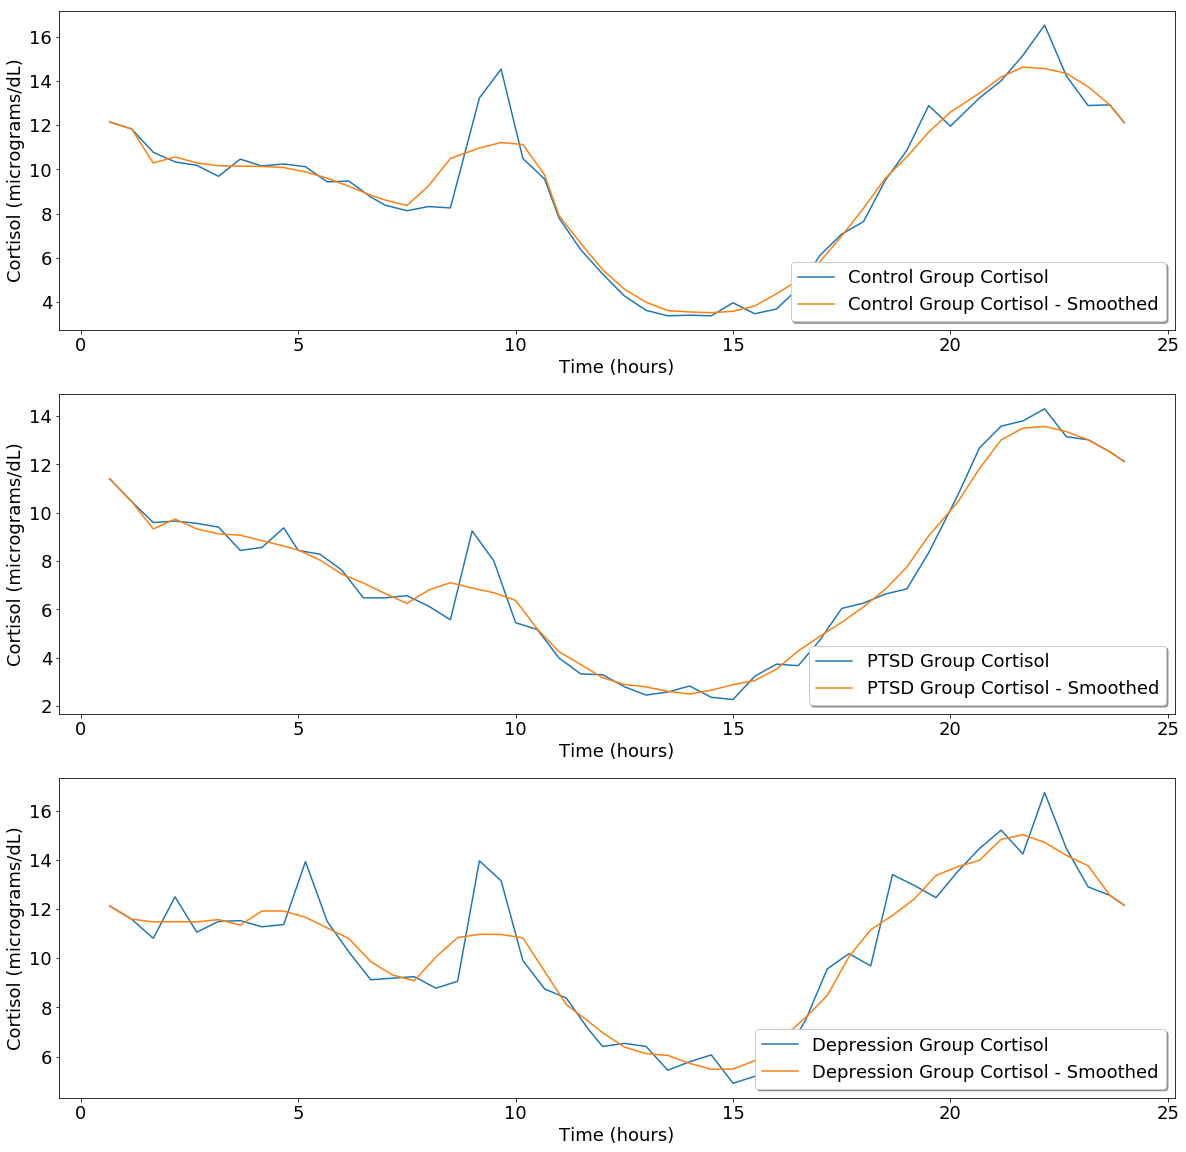

In [19]:
font = {'size'   : 18}
matplotlib.rc('font', **font)

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (20,20))

ax1.plot(yehudaControlCortisol[:,0], yehudaControlCortisol[:,1], label = "Control Group Cortisol")
ax1.plot(yehudaControlCortisol_smooth[:,0], yehudaControlCortisol_smooth[:,1], label = "Control Group Cortisol - Smoothed")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(yehudaPTSDCortisol[:,0], yehudaPTSDCortisol[:,1], label = "PTSD Group Cortisol")
ax2.plot(yehudaPTSDCortisol_smooth[:,0], yehudaPTSDCortisol_smooth[:,1], label = "PTSD Group Cortisol - Smoothed")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(yehudaDepressedCortisol[:,0], yehudaDepressedCortisol[:,1], label = "Depression Group Cortisol")
ax3.plot(yehudaDepressedCortisol_smooth[:,0], yehudaDepressedCortisol_smooth[:,1], label = "Depression Group Cortisol - Smoothed")
ax3.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax3.legend(loc="lower right", shadow = True, fancybox = True)


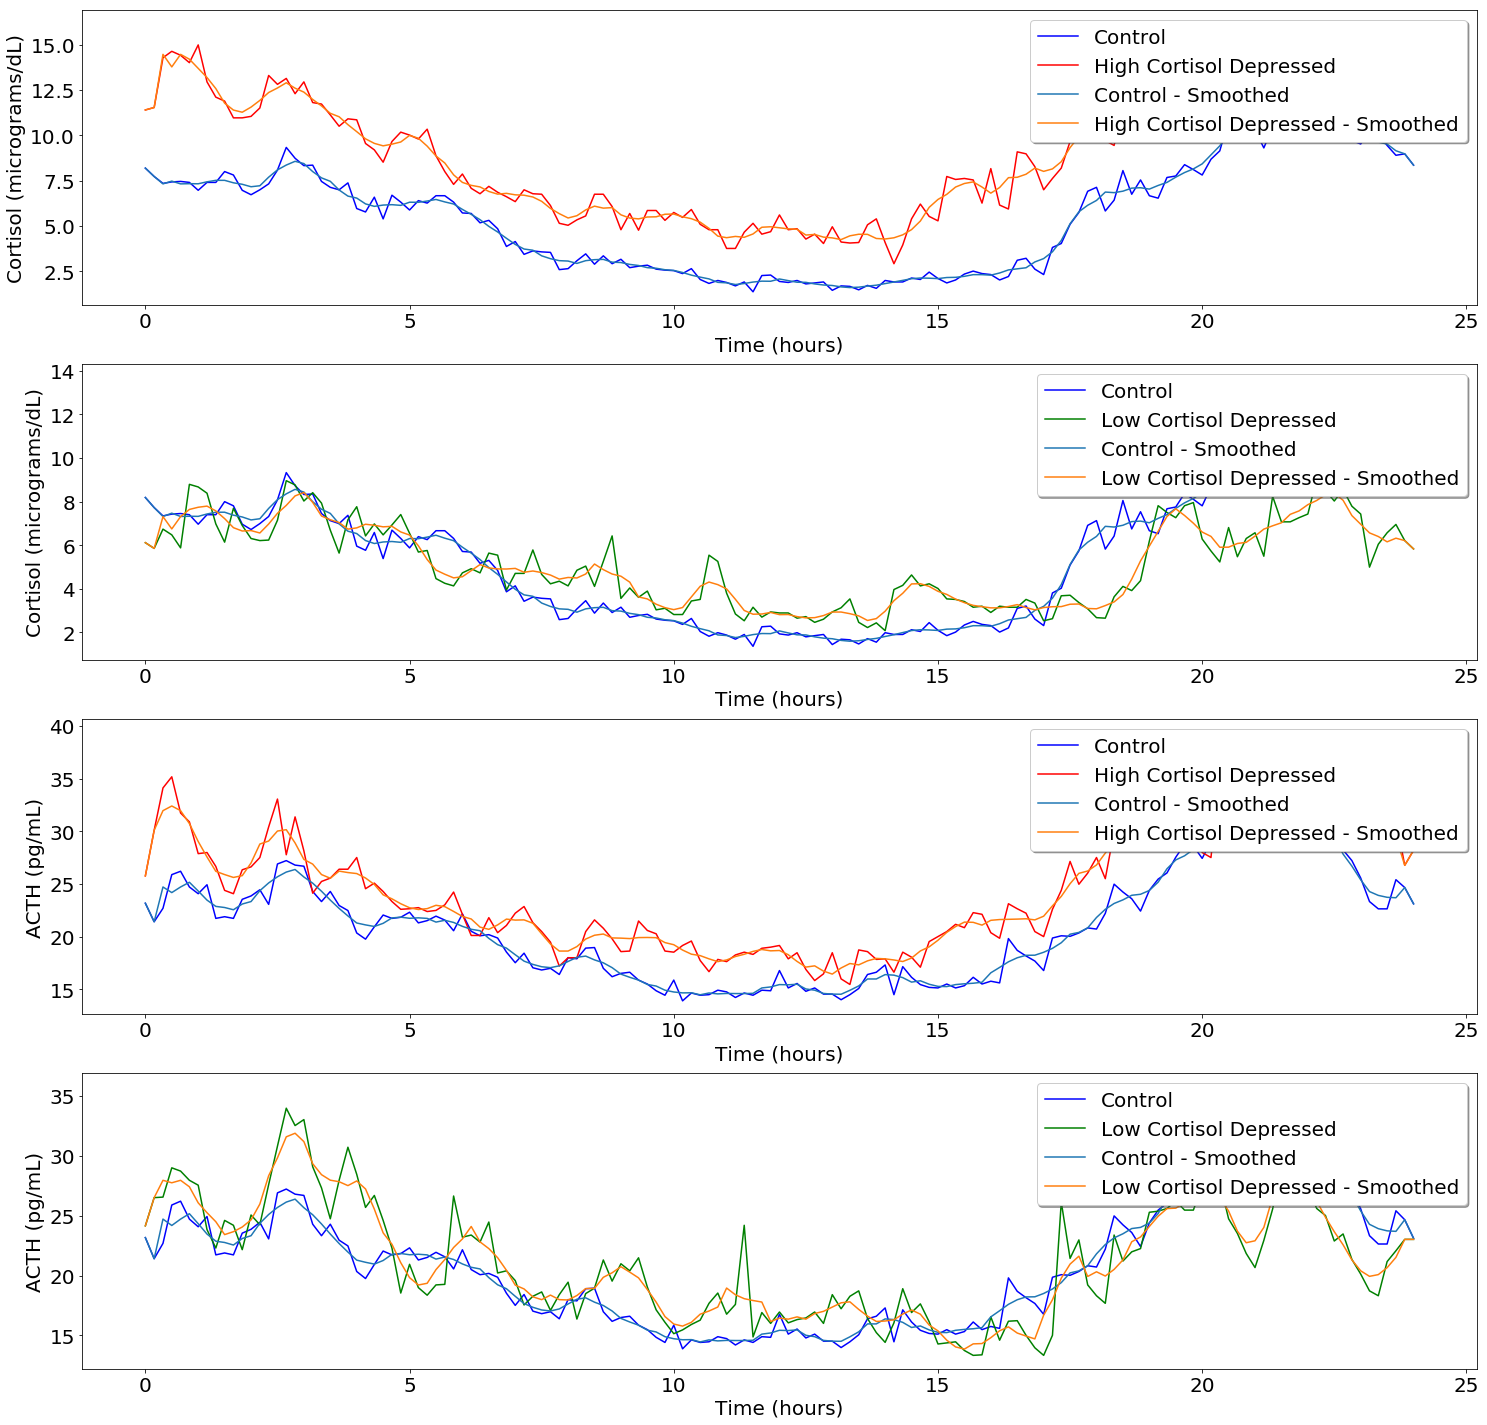

In [20]:
#mpld3.enable_notebook()
%matplotlib inline

font = {'size'   : 20}
matplotlib.rc('font', **font)
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, figsize = (25,25))

ax1.plot(carrollControlCortisol_rearr[:,0], carrollControlCortisol_rearr[:,1], 'b', label = "Control")
ax1.plot(carrollHCDepressedCortisol_rearr[:,0], carrollHCDepressedCortisol_rearr[:,1], 'r', label = "High Cortisol Depressed")
ax1.plot(carrollControlCortisol_rearr_smooth[:,0], carrollControlCortisol_rearr_smooth[:,1], label = "Control - Smoothed")
ax1.plot(carrollHCDepressedCortisol_rearr_smooth[:,0], carrollHCDepressedCortisol_rearr_smooth[:,1], label = "High Cortisol Depressed - Smoothed")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax1.legend(loc="upper right", shadow = True, fancybox = True)

ax2.plot(carrollControlCortisol_rearr[:,0], carrollControlCortisol_rearr[:,1], 'b', label = "Control")
ax2.plot(carrollLCDepressedCortisol_rearr[:,0], carrollLCDepressedCortisol_rearr[:,1], 'g', label = "Low Cortisol Depressed")
ax2.plot(carrollControlCortisol_rearr_smooth[:,0], carrollControlCortisol_rearr_smooth[:,1], label = "Control - Smoothed")
ax2.plot(carrollLCDepressedCortisol_rearr_smooth[:,0], carrollLCDepressedCortisol_rearr_smooth[:,1], label = "Low Cortisol Depressed - Smoothed")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (micrograms/dL)")
ax2.legend(loc="upper right", shadow = True, fancybox = True)

ax3.plot(carrollControlACTH_rearr[:,0], carrollControlACTH_rearr[:,1], 'b', label = "Control")
ax3.plot(carrollHCDepressedACTH_rearr[:,0], carrollHCDepressedACTH_rearr[:,1], 'r', label = "High Cortisol Depressed")
ax3.plot(carrollControlACTH_rearr_smooth[:,0], carrollControlACTH_rearr_smooth[:,1], label = "Control - Smoothed")
ax3.plot(carrollHCDepressedACTH_rearr_smooth[:,0], carrollHCDepressedACTH_rearr_smooth[:,1], label = "High Cortisol Depressed - Smoothed")
ax3.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax3.legend(loc="upper right", shadow = True, fancybox = True)

ax4.plot(carrollControlACTH_rearr[:,0], carrollControlACTH_rearr[:,1], 'b', label = "Control")
ax4.plot(carrollLCDepressedACTH_rearr[:,0], carrollLCDepressedACTH_rearr[:,1], 'g', label = "Low Cortisol Depressed")
ax4.plot(carrollControlACTH_rearr_smooth[:,0], carrollControlACTH_rearr_smooth[:,1], label = "Control - Smoothed")
ax4.plot(carrollLCDepressedACTH_rearr_smooth[:,0], carrollLCDepressedACTH_rearr_smooth[:,1], label = "Low Cortisol Depressed - Smoothed")
ax4.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax4.legend(loc="upper right", shadow = True, fancybox = True)

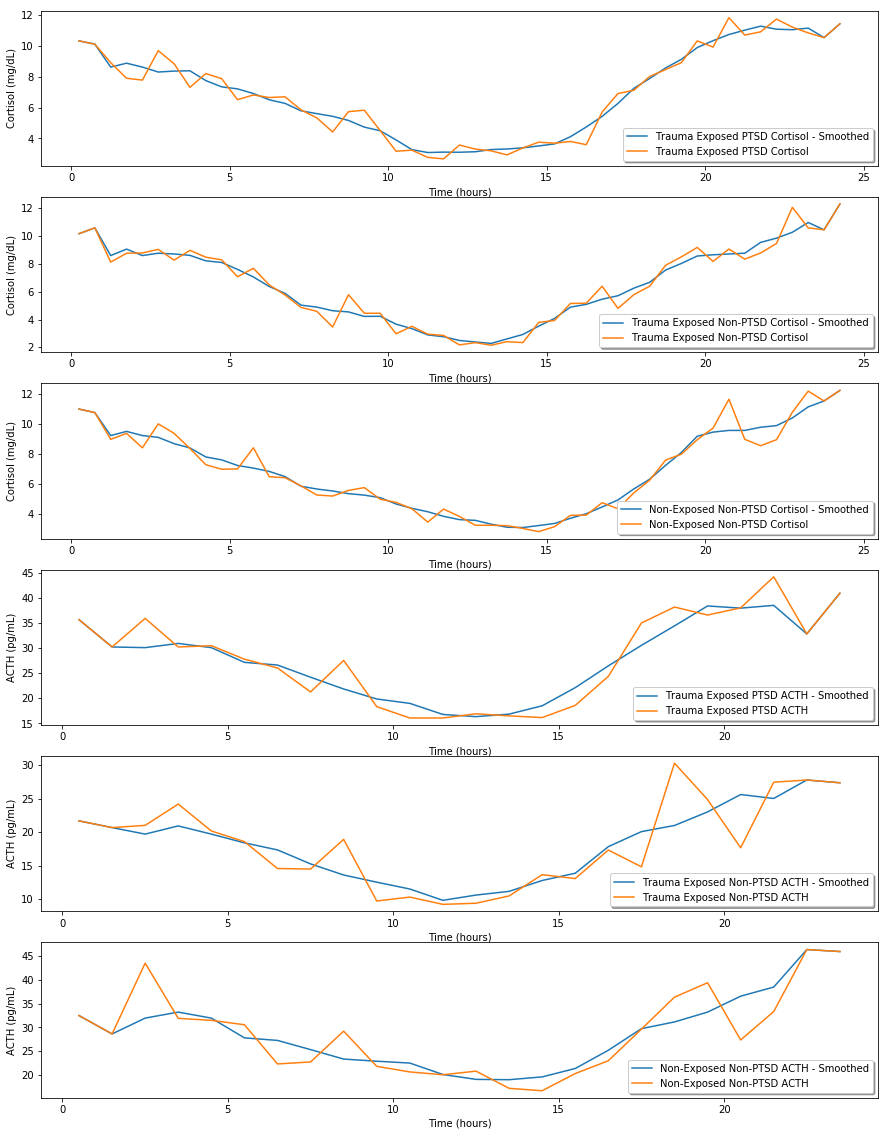

In [21]:
%matplotlib inline

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows = 6, figsize = (15,20))

ax1.plot(golierPTSDCortisol_rearr_smooth[:,0], golierPTSDCortisol_rearr_smooth[:,1], label = "Trauma Exposed PTSD Cortisol - Smoothed")
ax1.plot(golierPTSDCortisol_rearr[:,0], golierPTSDCortisol_rearr[:,1], label = "Trauma Exposed PTSD Cortisol")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (mg/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(golierNonPTSDTraumaExposedCortisol_rearr_smooth[:,0], golierNonPTSDTraumaExposedCortisol_rearr_smooth[:,1], label = "Trauma Exposed Non-PTSD Cortisol - Smoothed")
ax2.plot(golierNonPTSDTraumaExposedCortisol_rearr[:,0], golierNonPTSDTraumaExposedCortisol_rearr[:,1], label = "Trauma Exposed Non-PTSD Cortisol")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (mg/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(golierNonPTSDNonExposedCortisol_rearr_smooth[:,0], golierNonPTSDNonExposedCortisol_rearr_smooth[:,1], label = "Non-Exposed Non-PTSD Cortisol - Smoothed")
ax3.plot(golierNonPTSDNonExposedCortisol_rearr[:,0], golierNonPTSDNonExposedCortisol_rearr[:,1], label = "Non-Exposed Non-PTSD Cortisol")
ax3.set(xlabel="Time (hours)", ylabel="Cortisol (mg/dL)")
ax3.legend(loc="lower right", shadow = True, fancybox = True)

ax4.plot(golierPTSDACTH_rearr_smooth[:,0], golierPTSDACTH_rearr_smooth[:,1], label = "Trauma Exposed PTSD ACTH - Smoothed")
ax4.plot(golierPTSDACTH_rearr[:,0], golierPTSDACTH_rearr[:,1], label = "Trauma Exposed PTSD ACTH")
ax4.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax4.legend(loc="lower right", shadow = True, fancybox = True)

ax5.plot(golierNonPTSDTraumaExposedACTH_rearr_smooth[:,0], golierNonPTSDTraumaExposedACTH_rearr_smooth[:,1], label = "Trauma Exposed Non-PTSD ACTH - Smoothed")
ax5.plot(golierNonPTSDTraumaExposedACTH_rearr[:,0], golierNonPTSDTraumaExposedACTH_rearr[:,1], label = "Trauma Exposed Non-PTSD ACTH")
ax5.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax5.legend(loc="lower right", shadow = True, fancybox = True)

ax6.plot(golierNonPTSDNonExposedACTH_rearr_smooth[:,0], golierNonPTSDNonExposedACTH_rearr_smooth[:,1], label = "Non-Exposed Non-PTSD ACTH - Smoothed")
ax6.plot(golierNonPTSDNonExposedACTH_rearr[:,0], golierNonPTSDNonExposedACTH_rearr[:,1], label = "Non-Exposed Non-PTSD ACTH")
ax6.set(xlabel="Time (hours)", ylabel="ACTH (pg/mL)")
ax6.legend(loc="lower right", shadow = True, fancybox = True)


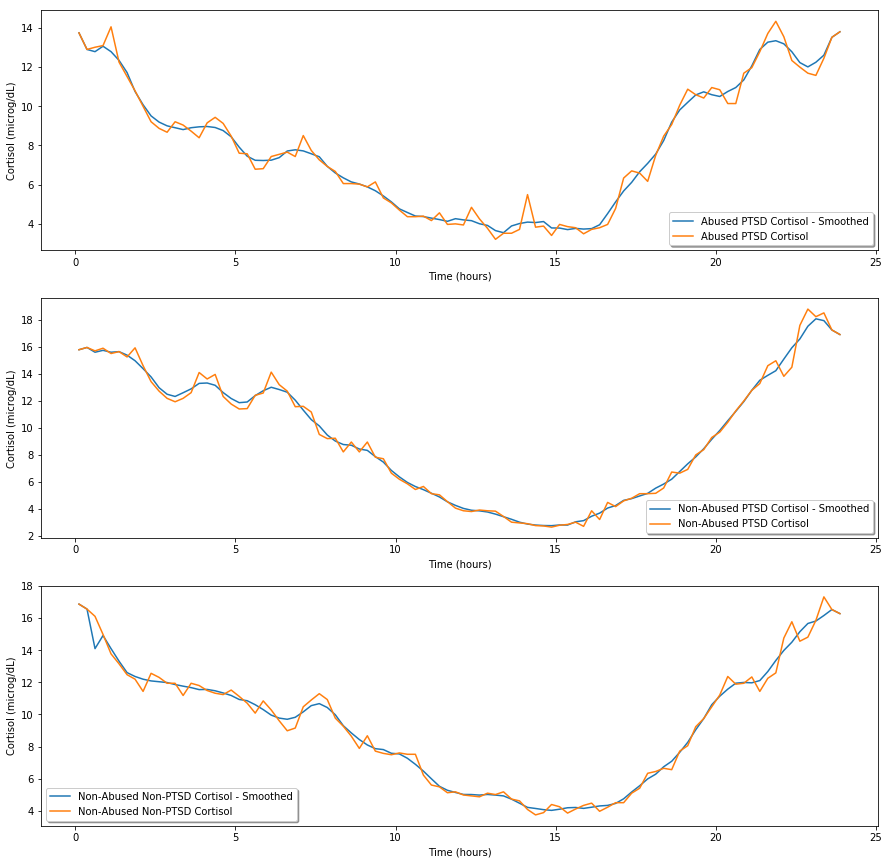

In [22]:
%matplotlib inline

fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15,15))

ax1.plot(bremnerAbusedPTSDCortisol_rearr_smooth[:,0], bremnerAbusedPTSDCortisol_rearr_smooth[:,1], label = "Abused PTSD Cortisol - Smoothed")
ax1.plot(bremnerAbusedPTSDCortisol_rearr[:,0], bremnerAbusedPTSDCortisol_rearr[:,1], label = "Abused PTSD Cortisol")
ax1.set(xlabel="Time (hours)", ylabel="Cortisol (microg/dL)")
ax1.legend(loc="lower right", shadow = True, fancybox = True)

ax2.plot(bremnerNonAbusedPTSDCortisol_rearr_smooth[:,0], bremnerNonAbusedPTSDCortisol_rearr_smooth[:,1], label = "Non-Abused PTSD Cortisol - Smoothed")
ax2.plot(bremnerNonAbusedPTSDCortisol_rearr[:,0], bremnerNonAbusedPTSDCortisol_rearr[:,1], label = "Non-Abused PTSD Cortisol")
ax2.set(xlabel="Time (hours)", ylabel="Cortisol (microg/dL)")
ax2.legend(loc="lower right", shadow = True, fancybox = True)

ax3.plot(bremnerNonAbusedNonPTSDCortisol_rearr_smooth[:,0], bremnerNonAbusedNonPTSDCortisol_rearr_smooth[:,1], label = "Non-Abused Non-PTSD Cortisol - Smoothed")
ax3.plot(bremnerNonAbusedNonPTSDCortisol_rearr[:,0], bremnerNonAbusedNonPTSDCortisol_rearr[:,1], label = "Non-Abused Non-PTSD Cortisol")
ax3.set(xlabel="Time (hours)", ylabel="Cortisol (microg/dL)")
ax3.legend(loc="lower left", shadow = True, fancybox = True)


### Plot Nelson Data Sets <a name="plotNelsonData"></a>

[Text(0, 0.5, 'Cortisol (micrograms/dL)'),
 Text(0.5, 0, 'Time (h)'),
 Text(0.5, 1.0, 'Cortisol Concentration')]

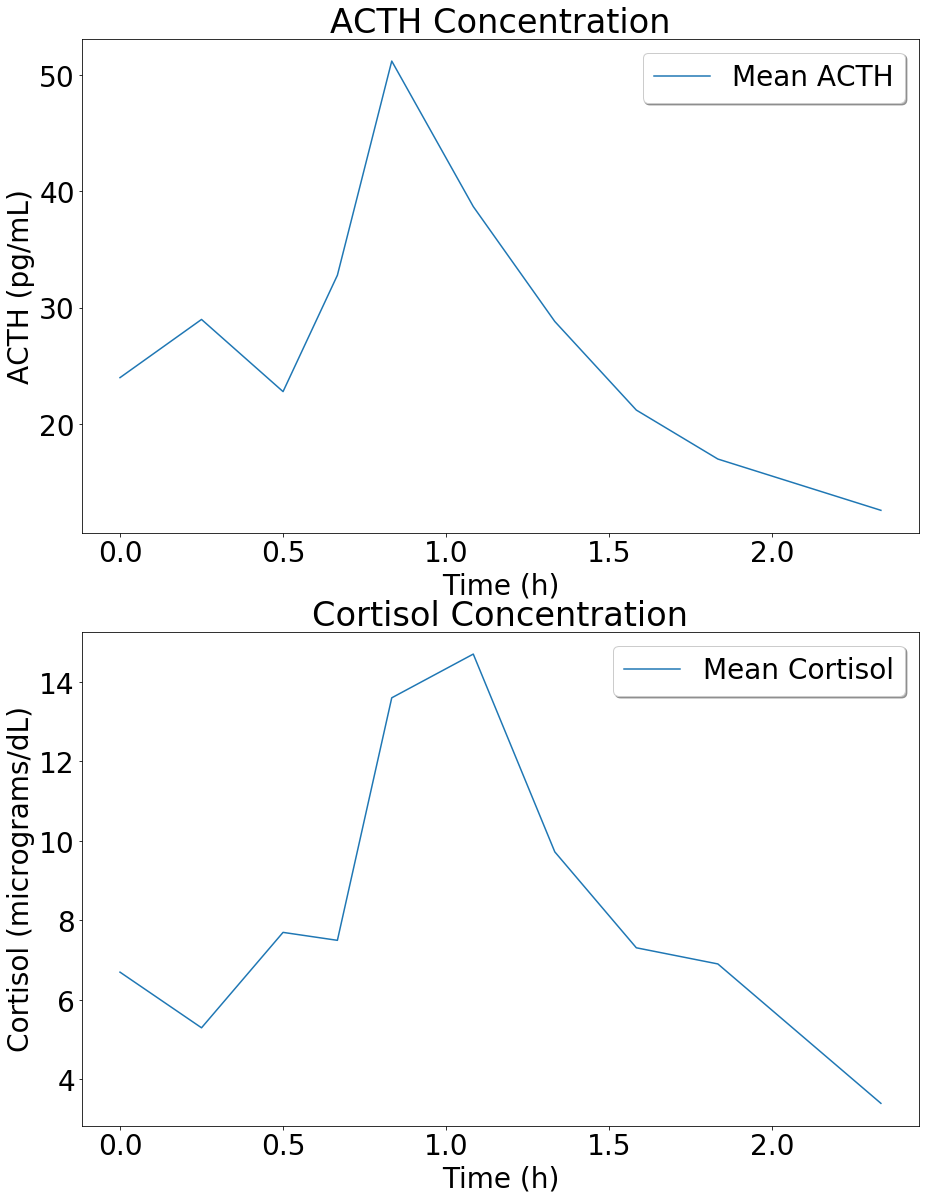

In [23]:
matplotlib.rc('font', **{'size'   : 28})

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15,20))

ax1.plot(nelsonACTH[:,0], nelsonACTH[:,3], label = "Mean ACTH")
ax1.legend(loc = "upper right", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (h)", ylabel = "ACTH (pg/mL)", title = "ACTH Concentration")

ax2.plot(nelsonCortisol[:,0], nelsonCortisol[:,3], label = "Mean Cortisol")
ax2.legend(loc = "upper right", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (h)", ylabel = "Cortisol (micrograms/dL)", title = "Cortisol Concentration")

[Text(0, 0.5, 'Cortisol (micrograms/dL)'),
 Text(0.5, 0, 'Time (h)'),
 Text(0.5, 1.0, 'Cortisol Concentration')]

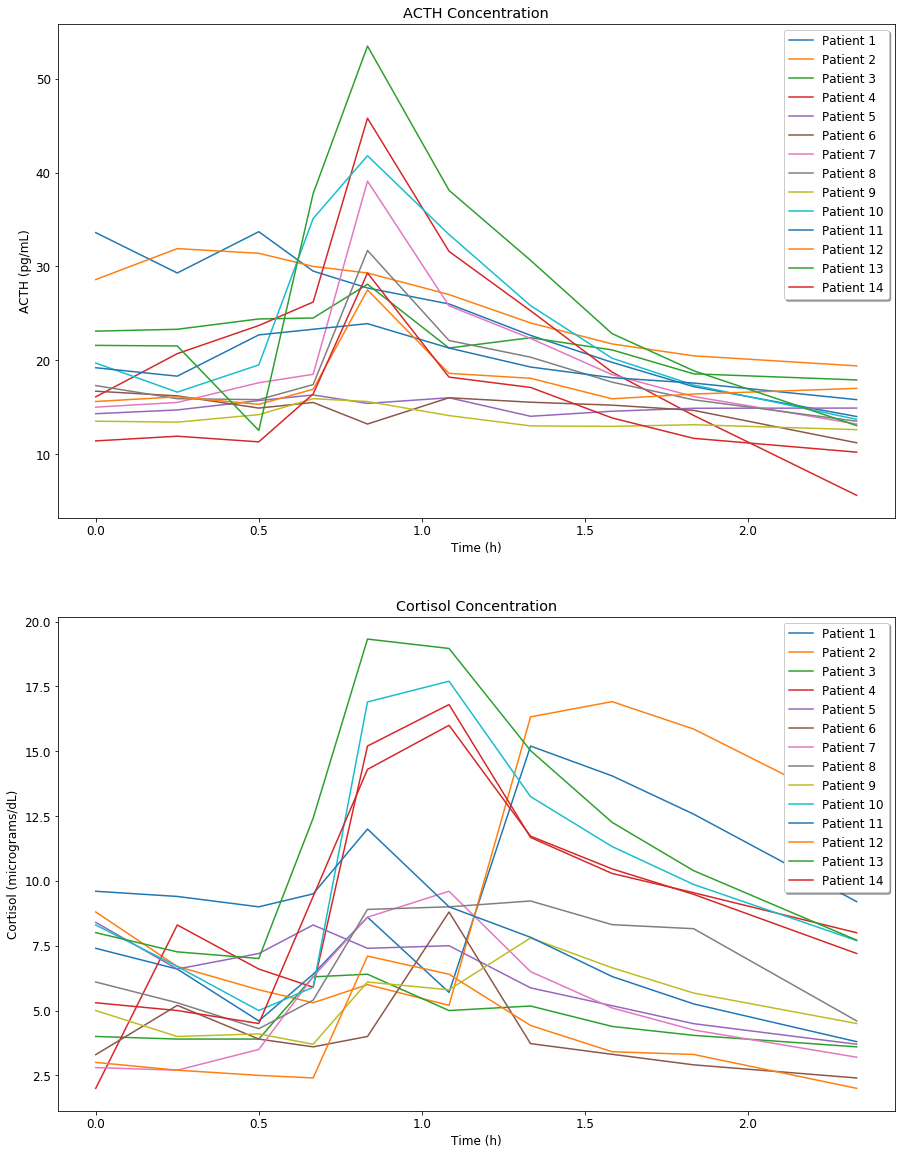

In [24]:
# graph the Nelson data (only showing one patient at a time currently)
matplotlib.rc('font', **{'size'   : 12})

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15,20))

#ax1.plot(nelsonACTH[:,0], nelsonACTH[:,1])
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,0], label = "Patient 1")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,1], label = "Patient 2")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,2], label = "Patient 3")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,3], label = "Patient 4")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,4], label = "Patient 5")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,5], label = "Patient 6")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,6], label = "Patient 7")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,7], label = "Patient 8")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,8], label = "Patient 9")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,9], label = "Patient 10")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,10], label = "Patient 11")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,11], label = "Patient 12")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,12], label = "Patient 13")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,13], label = "Patient 14")
ax1.legend(loc = "upper right", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (h)", ylabel = "ACTH (pg/mL)", title = "ACTH Concentration")

#ax2.plot(nelsonCortisol[:,0], nelsonCortisol[:,1])
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,0], label = "Patient 1")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,1], label = "Patient 2")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,2], label = "Patient 3")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,3], label = "Patient 4")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,4], label = "Patient 5")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,5], label = "Patient 6")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,6], label = "Patient 7")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,7], label = "Patient 8")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,8], label = "Patient 9")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,9], label = "Patient 10")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,10], label = "Patient 11")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,11], label = "Patient 12")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,12], label = "Patient 13")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,13], label = "Patient 14")
ax2.legend(loc = "upper right", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (h)", ylabel = "Cortisol (micrograms/dL)", title = "Cortisol Concentration")

[Text(0, 0.5, 'Cortisol (micrograms/dL)'),
 Text(0.5, 0, 'Time (h)'),
 Text(0.5, 1.0, 'Cortisol Concentration')]

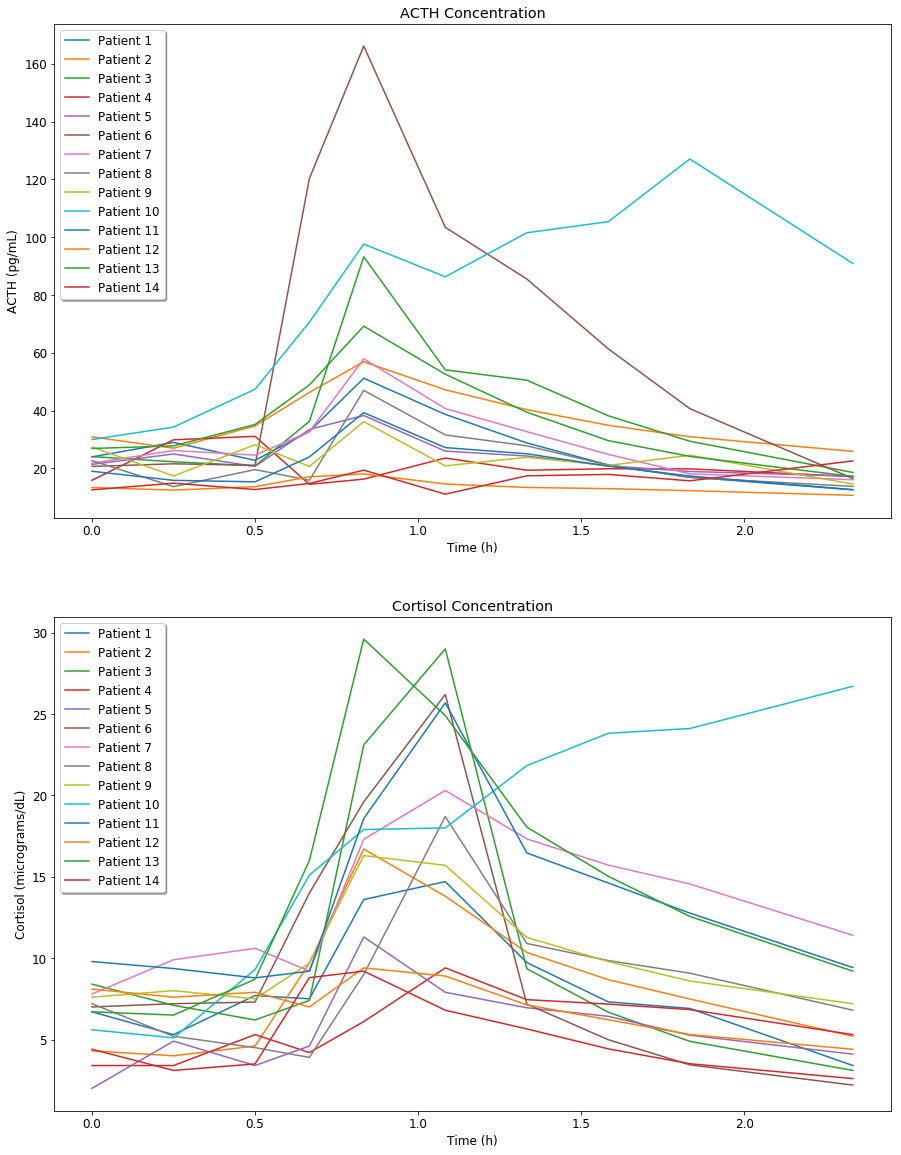

In [25]:
# graph the Nelson data (only showing one patient at a time currently)
matplotlib.rc('font', **{'size'   : 12})

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15,20))

#ax1.plot(nelsonACTH[:,0], nelsonACTH[:,1])
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,0], label = "Patient 1")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,1], label = "Patient 2")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,2], label = "Patient 3")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,3], label = "Patient 4")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,4], label = "Patient 5")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,5], label = "Patient 6")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,6], label = "Patient 7")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,7], label = "Patient 8")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,8], label = "Patient 9")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,9], label = "Patient 10")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,10], label = "Patient 11")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,11], label = "Patient 12")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,12], label = "Patient 13")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,13], label = "Patient 14")
ax1.legend(loc = "upper left", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (h)", ylabel = "ACTH (pg/mL)", title = "ACTH Concentration")

#ax2.plot(nelsonCortisol[:,0], nelsonCortisol[:,1])
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,0], label = "Patient 1")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,1], label = "Patient 2")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,2], label = "Patient 3")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,3], label = "Patient 4")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,4], label = "Patient 5")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,5], label = "Patient 6")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,6], label = "Patient 7")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,7], label = "Patient 8")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,8], label = "Patient 9")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,9], label = "Patient 10")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,10], label = "Patient 11")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,11], label = "Patient 12")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,12], label = "Patient 13")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,13], label = "Patient 14")
ax2.legend(loc = "upper left", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (h)", ylabel = "Cortisol (micrograms/dL)", title = "Cortisol Concentration")

In [26]:
# compute means of all patients in each subtype of depression, all control patients, 
# and all subtypes of depression combined

# initialize empty arrays to fill with mean values
nelsonHealthyCortisol_mean = np.zeros(len(nelsonHealthyCortisol[:,0]))
nelsonHealthyACTH_mean = np.zeros(len(nelsonHealthyACTH[:,0]))
nelsonDepressedCortisol_mean = np.zeros(len(nelsonMelancholicCortisol[:,0]))
nelsonDepressedACTH_mean = np.zeros(len(nelsonMelancholicACTH[:,0]))
nelsonMelancholicCortisol_mean = np.zeros(len(nelsonMelancholicCortisol[:,0]))
nelsonMelancholicACTH_mean = np.zeros(len(nelsonMelancholicACTH[:,0]))
nelsonAtypicalCortisol_mean = np.zeros(len(nelsonAtypicalCortisol[:,0]))
nelsonAtypicalACTH_mean = np.zeros(len(nelsonAtypicalACTH[:,0]))
nelsonNeitherCortisol_mean = np.zeros(len(nelsonNeitherCortisol[:,0]))
nelsonNeitherACTH_mean = np.zeros(len(nelsonNeitherACTH[:,0]))

# loop through each time step and add the sum of all patients' values at that time step
for i in range(len(nelsonHealthyCortisol[:,0])):
    nelsonHealthyCortisol_mean[i] += np.sum(nelsonHealthyCortisol[i,:])
    nelsonDepressedCortisol_mean[i] += np.sum(nelsonMelancholicCortisol[i,:])
    nelsonMelancholicCortisol_mean[i] += np.sum(nelsonMelancholicCortisol[i,:])
    nelsonDepressedCortisol_mean[i] += np.sum(nelsonAtypicalCortisol[i,:])
    nelsonAtypicalCortisol_mean[i] += np.sum(nelsonAtypicalCortisol[i,:])
    nelsonDepressedCortisol_mean[i] += np.sum(nelsonNeitherCortisol[i,:])
    nelsonNeitherCortisol_mean[i] += np.sum(nelsonNeitherCortisol[i,:])
    
    nelsonHealthyACTH_mean[i] += np.sum(nelsonHealthyACTH[i,:])
    nelsonDepressedACTH_mean[i] += np.sum(nelsonMelancholicACTH[i,:])
    nelsonMelancholicACTH_mean[i] += np.sum(nelsonMelancholicACTH[i,:])
    nelsonDepressedACTH_mean[i] += np.sum(nelsonAtypicalACTH[i,:])
    nelsonAtypicalACTH_mean[i] += np.sum(nelsonAtypicalACTH[i,:])
    nelsonDepressedACTH_mean[i] += np.sum(nelsonNeitherACTH[i,:])
    nelsonNeitherACTH_mean[i] += np.sum(nelsonNeitherACTH[i,:])

# divide by the number of patients for each set to get the mean
nelsonHealthyCortisol_mean = nelsonHealthyCortisol_mean/15
nelsonHealthyACTH_mean = nelsonHealthyACTH_mean/15

nelsonDepressedCortisol_mean = nelsonDepressedCortisol_mean/43
nelsonDepressedACTH_mean = nelsonDepressedACTH_mean/43

nelsonMelancholicCortisol_mean = nelsonMelancholicCortisol_mean/15
nelsonMelancholicACTH_mean = nelsonMelancholicACTH_mean/15

nelsonAtypicalCortisol_mean = nelsonAtypicalCortisol_mean/14
nelsonAtypicalACTH_mean = nelsonAtypicalACTH_mean/14

nelsonNeitherCortisol_mean = nelsonNeitherCortisol_mean/14
nelsonNeitherACTH_mean = nelsonNeitherACTH_mean/14

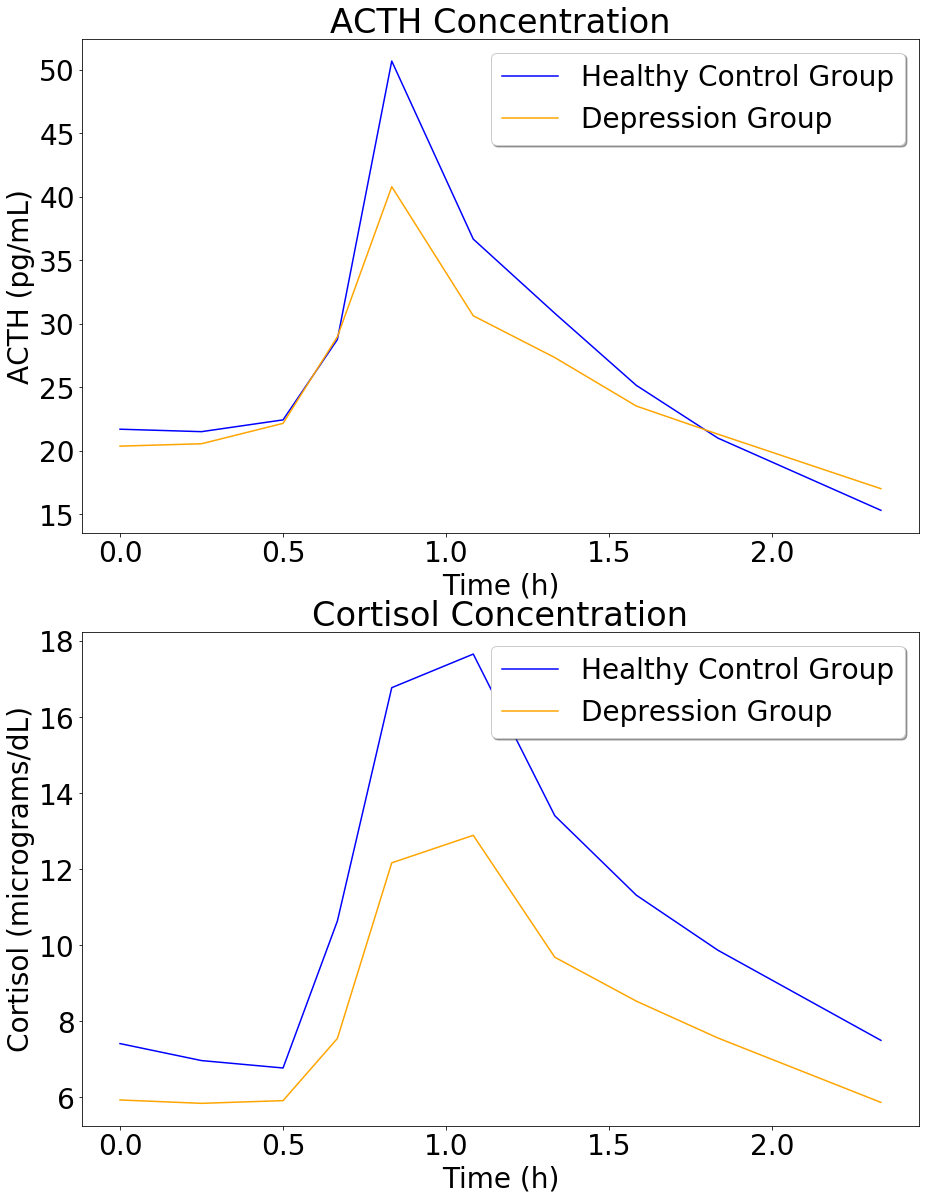

In [27]:
%matplotlib inline

matplotlib.rc('font', **{'size'   : 28})

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (15,20))

ax1.plot(nelsonACTH[:,0], nelsonHealthyACTH_mean, label = "Healthy Control Group", color = "blue")
ax1.plot(nelsonACTH[:,0], nelsonDepressedACTH_mean, label = "Depression Group", color = "orange")
ax1.legend(loc = "upper right", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (h)", ylabel = "ACTH (pg/mL)", title = "ACTH Concentration")

ax2.plot(nelsonCortisol[:,0], nelsonHealthyCortisol_mean, label = "Healthy Control Group", color = "blue")
ax2.plot(nelsonCortisol[:,0], nelsonDepressedCortisol_mean, label = "Depression Group", color = "orange")
ax2.legend(loc = "upper right", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (h)", ylabel = "Cortisol (micrograms/dL)", title = "Cortisol Concentration")

#plt.savefig("Nelson Data Visualization Figures/nelson-control-vs-depressed-mean-comparison.png", dpi = 300)

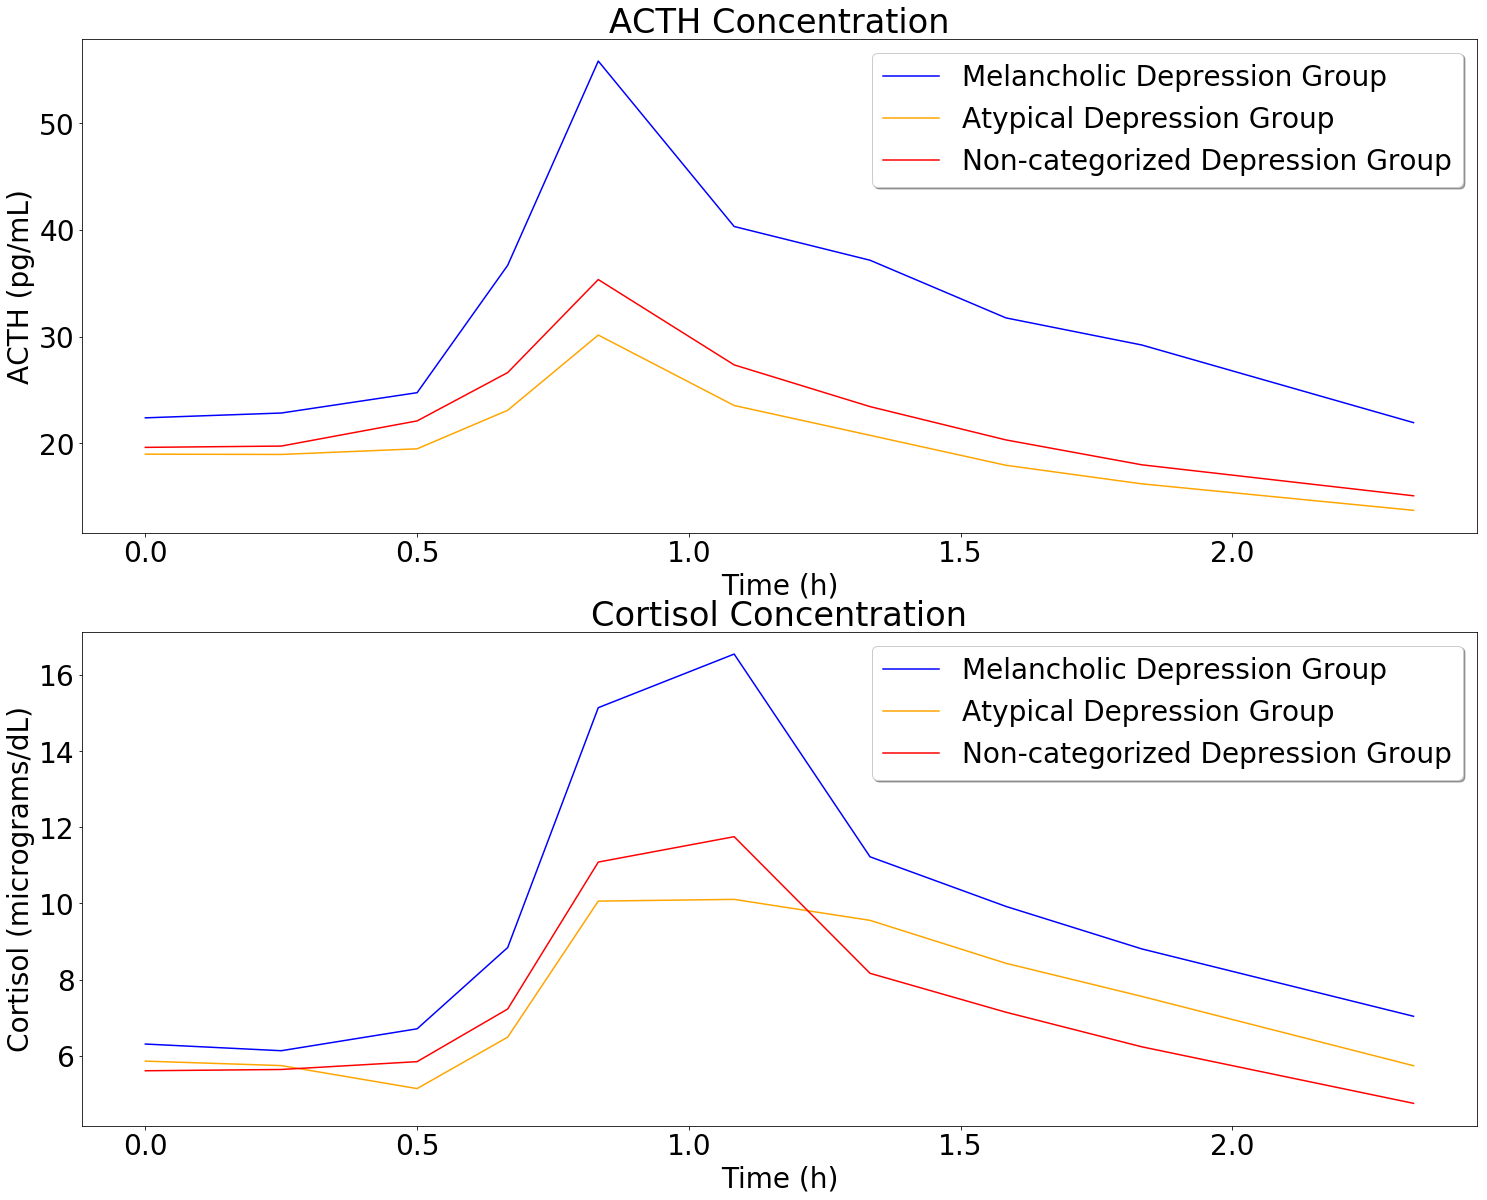

In [28]:
%matplotlib inline

matplotlib.rc('font', **{'size'   : 28})

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (25,20))

ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH_mean, label = "Melancholic Depression Group", color = "blue")
ax1.plot(nelsonACTH[:,0], nelsonAtypicalACTH_mean, label = "Atypical Depression Group", color = "orange")
ax1.plot(nelsonACTH[:,0], nelsonNeitherACTH_mean, label = "Non-categorized Depression Group", color = "red")
ax1.legend(loc = "upper right", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (h)", ylabel = "ACTH (pg/mL)", title = "ACTH Concentration")

ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol_mean, label = "Melancholic Depression Group", color = "blue")
ax2.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol_mean, label = "Atypical Depression Group", color = "orange")
ax2.plot(nelsonCortisol[:,0], nelsonNeitherCortisol_mean, label = "Non-categorized Depression Group", color = "red")
ax2.legend(loc = "upper right", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (h)", ylabel = "Cortisol (micrograms/dL)", title = "Cortisol Concentration")

#plt.savefig("Nelson Data Visualization Figures/nelson-depression-subtypes-mean-comparison.png", dpi = 300)

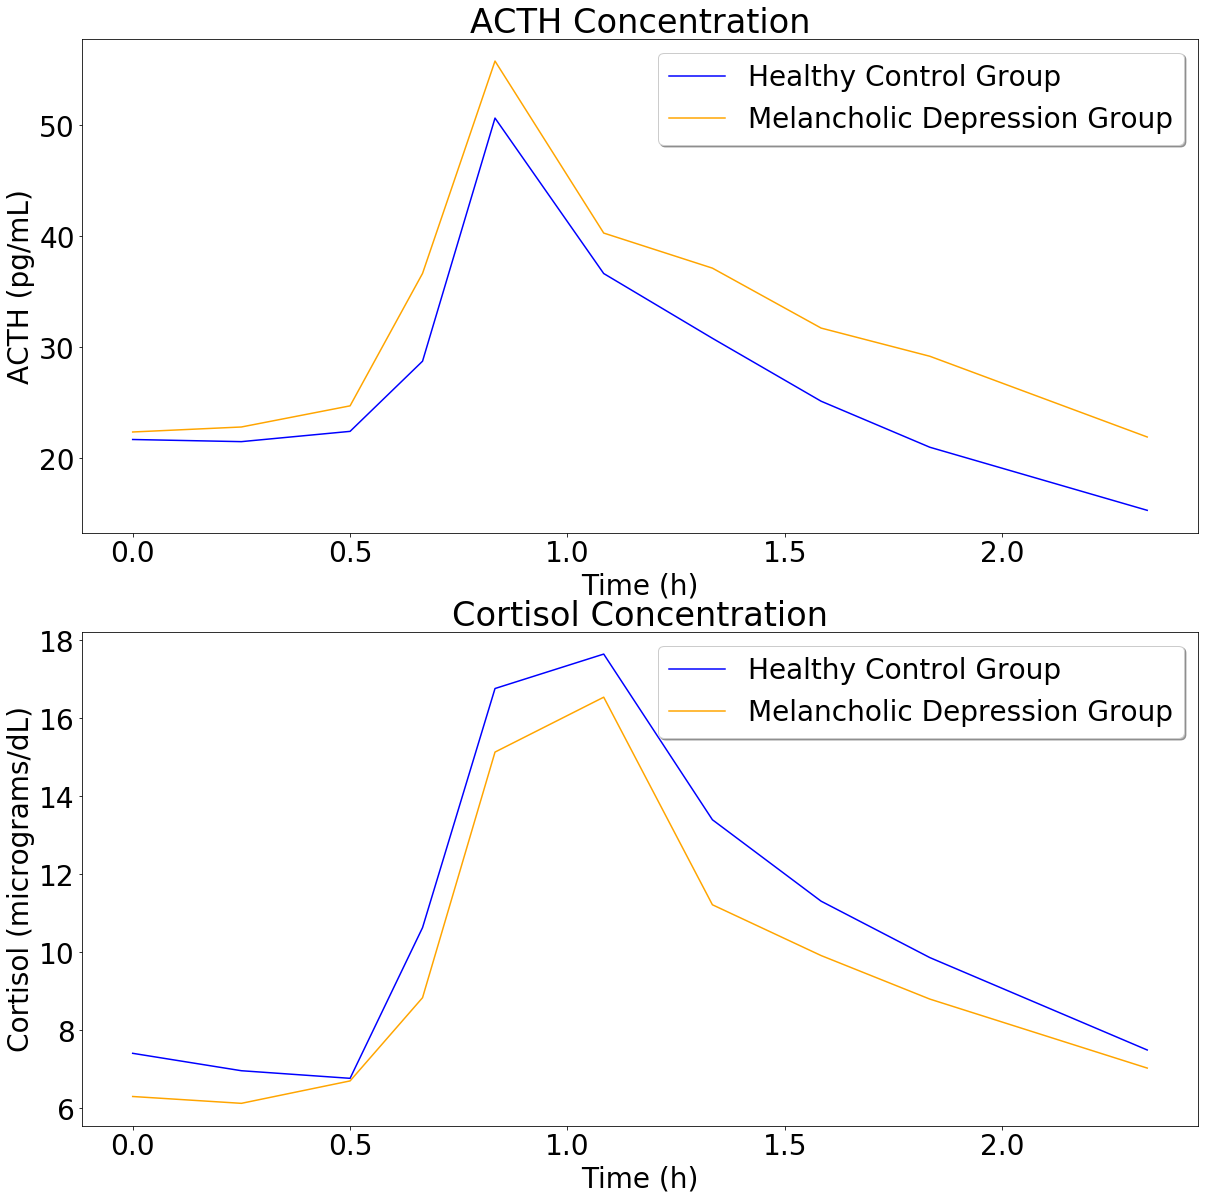

In [32]:
%matplotlib inline

matplotlib.rc('font', **{'size'   : 28})

fig, (ax1, ax2) = plt.subplots(nrows = 2, figsize = (20,20))

ax1.plot(nelsonACTH[:,0], nelsonHealthyACTH_mean, label = "Healthy Control Group", color = "blue")
ax1.plot(nelsonACTH[:,0], nelsonMelancholicACTH_mean, label = "Melancholic Depression Group", color = "orange")
ax1.legend(loc = "upper right", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (h)", ylabel = "ACTH (pg/mL)", title = "ACTH Concentration")

ax2.plot(nelsonCortisol[:,0], nelsonHealthyCortisol_mean, label = "Healthy Control Group", color = "blue")
ax2.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol_mean, label = "Melancholic Depression Group", color = "orange")
ax2.legend(loc = "upper right", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (h)", ylabel = "Cortisol (micrograms/dL)", title = "Cortisol Concentration")

#plt.savefig("Nelson Data Visualization Figures/nelson-control-vs-melancholic-depression-mean-comparison.png", dpi = 300)

## Model Function--Includes ODE Solver <a name="modelfunction"></a>

In [32]:
def model(params, ics):
    def ode_system(t, y):
        dy = np.zeros(4)
        # parameters to be optimized including p_stress
        #[k_stress, k_i, V_S3, K_m1, K_P2, V_S4, K_m2, K_P3, V_S5, K_m3, K_d1, K_d2, K_d3, n1, n2, K_b, G_tot, V_S2, K1, K_d5, p_stress] = params
        
        # parameters to be optimized not including p_stress
        [k_stress, k_i, V_S3, K_m1, K_P2, V_S4, K_m2, K_P3, V_S5, K_m3, K_d1, K_d2, K_d3, n1, n2, K_b, G_tot, V_S2, K1, K_d5] = params
        
        # Change whether we use the stress_input function to add a time-dependent stressor by changing which equation
        #  for dy[0] is not commented
        #dy[0] = stress_input(t)*k_stress*(k_i**n2/(k_i**n2 + y[3]**n2)) - V_S3*(y[0]/(K_m1 + y[0])) - K_d1*y[0]
        dy[0] = k_stress*(k_i**n2/(k_i**n2 + y[3]**n2)) - V_S3*(y[0]/(K_m1 + y[0])) - K_d1*y[0]
        dy[1] = K_P2*y[0]*(k_i**n2/(k_i**n2 + y[3]**n2)) - V_S4*(y[1]/(K_m2 + y[1])) - K_d2*y[1]
        dy[2] = K_P3*y[1] - V_S5*(y[2]/(K_m3 + y[2])) - K_d3*y[2]
        dy[3] = K_b*y[2]*(G_tot - y[3]) + V_S2*(y[3]**n1/(K1**n1 + y[3]**n1)) - K_d5*y[3]

        return dy
    
    def stress_input(t):
        #if (0.5 <= t <= 0.51):
        if (0.5 <= t <= 0.83):
            return p_stress
        else:
            return 1
    
    timeSeries = ODEsolver.solve(ode_system, ics, t_start, t_step, t_end, ode_steps=1000, ode_atol = 1e-8, ode_rtol = 1e-8)
    return timeSeries

## Cost Function Definition <a name="cost"></a>

In [33]:
def cost_fun(params):
    simData = model(params, y0)
    
    return costFun.cost(params, nelsonACTH[:,0], nelsonMelancholicACTH[:,0], nelsonCortisol[:,0], nelsonMelancholicCortisol[:,0], simData)


## Run the Optimization <a name="run"></a>

In [34]:
# it looks, based on the XPP file from the authors, like they start CRH, ACTH, CORT and GR at 0 each and just run
# the solver until they reach some steady state

y0 = [1, nelsonMelancholicACTH[0,0], nelsonMelancholicCortisol[0,0], 2]
print(y0)

[1, 24.0, 6.7, 2]


In [35]:
# number of times to run the optimization
n = 5

# define an array to hold the population of parameter vectors
opt_pars = np.zeros((n, len(bounds)+1))

# initialize arrays to save simulation cortisol and ACTH data from each optimization
# change the number to 237 for Nelson TSST data or 2428 for basal data sets
sims_cort = np.zeros((237, n))
sims_acth = np.zeros((237, n))
sims_crh = np.zeros((237, n))
sims_gr = np.zeros((237, n))

In [36]:
%%time

# loop n times, running the optimization each time
for i in range(0,n):
    
    print(f"Optimization Run #{i+1}")
    
    # call the differential evolution optimization function on the cost function
    res = sco.differential_evolution(cost_fun, bounds, maxiter = 300, disp = True, popsize = 1)
    
    # alternatively, we can run the SHGO algorithm with the sampling_method = "sobol" flag to do global
    #     optimization with reporting all local minima, as well
    #res = sco.shgo(cost_fun, bounds, callback=callback_fun(*shgo_iter_steps), options = {"f_min": 0.1, "maxiter": None, "minimize_every_iter": True, "local_iter": False, "disp": True}, iters = 3)
    #res = sco.basinhopping(cost_fun, x0, niter = 1000)
    #res = sco.dual_annealing(cost_fun, bounds)
    
    # plug the optimized parameters into the solver
    optimizedSimData = model(res.x, y0)
    # save CRH, cortisol and ACTH data into sims arrays
    sims_gr[:,i] = optimizedSimData[:,4]
    sims_cort[:,i] = optimizedSimData[:,3]
    sims_acth[:,i] = optimizedSimData[:,2]
    sims_crh[:,i] = optimizedSimData[:,1]
    
    # save the cost function values and optimized parameters for each iteration into the array opt_pars
    opt_pars[i,0] = res.fun
    opt_pars[i,1:] = res.x

Optimization Run #1
differential_evolution step 1: f(x)= 1.97204
differential_evolution step 2: f(x)= 1.78168
differential_evolution step 3: f(x)= 1.42467
differential_evolution step 4: f(x)= 1.42467
differential_evolution step 5: f(x)= 1.42467
differential_evolution step 6: f(x)= 1.42467
differential_evolution step 7: f(x)= 1.30699
differential_evolution step 8: f(x)= 1.30699
differential_evolution step 9: f(x)= 1.22119
differential_evolution step 10: f(x)= 1.18771
differential_evolution step 11: f(x)= 1.18771
differential_evolution step 12: f(x)= 1.07658
differential_evolution step 13: f(x)= 1.07658
differential_evolution step 14: f(x)= 1.07658
differential_evolution step 15: f(x)= 1.07658
differential_evolution step 16: f(x)= 1.07658
differential_evolution step 17: f(x)= 1.07658
differential_evolution step 18: f(x)= 1.07498
differential_evolution step 19: f(x)= 1.07498
differential_evolution step 20: f(x)= 1.06361
differential_evolution step 21: f(x)= 1.06361
differential_evolution 

differential_evolution step 176: f(x)= 0.704696
differential_evolution step 177: f(x)= 0.704696
differential_evolution step 178: f(x)= 0.703176
differential_evolution step 179: f(x)= 0.703176
differential_evolution step 180: f(x)= 0.703176
differential_evolution step 181: f(x)= 0.703176
differential_evolution step 182: f(x)= 0.703176
differential_evolution step 183: f(x)= 0.703176
differential_evolution step 184: f(x)= 0.703176
differential_evolution step 185: f(x)= 0.703176
differential_evolution step 186: f(x)= 0.703176
differential_evolution step 187: f(x)= 0.703176
differential_evolution step 188: f(x)= 0.701625
differential_evolution step 189: f(x)= 0.701625
differential_evolution step 190: f(x)= 0.701625
differential_evolution step 191: f(x)= 0.701625
differential_evolution step 192: f(x)= 0.699135
differential_evolution step 193: f(x)= 0.698352
differential_evolution step 194: f(x)= 0.698352
Optimization Run #2
differential_evolution step 1: f(x)= 1.562
differential_evolution st

differential_evolution step 66: f(x)= 0.9874
differential_evolution step 67: f(x)= 0.9874
differential_evolution step 68: f(x)= 0.966191
differential_evolution step 69: f(x)= 0.966191
differential_evolution step 70: f(x)= 0.966191
differential_evolution step 71: f(x)= 0.966191
differential_evolution step 72: f(x)= 0.966191
differential_evolution step 73: f(x)= 0.966191
differential_evolution step 74: f(x)= 0.966191
differential_evolution step 75: f(x)= 0.966191
differential_evolution step 76: f(x)= 0.966191
differential_evolution step 77: f(x)= 0.966191
differential_evolution step 78: f(x)= 0.966191
differential_evolution step 79: f(x)= 0.966191
differential_evolution step 80: f(x)= 0.966191
differential_evolution step 81: f(x)= 0.966191
differential_evolution step 82: f(x)= 0.966191
differential_evolution step 83: f(x)= 0.966191
differential_evolution step 84: f(x)= 0.966191
differential_evolution step 85: f(x)= 0.966191
differential_evolution step 86: f(x)= 0.966191
differential_evol

differential_evolution step 6: f(x)= 1.43301
differential_evolution step 7: f(x)= 1.43301
differential_evolution step 8: f(x)= 1.43301
differential_evolution step 9: f(x)= 1.43301
differential_evolution step 10: f(x)= 1.43301
differential_evolution step 11: f(x)= 1.31393
differential_evolution step 12: f(x)= 1.31393
differential_evolution step 13: f(x)= 1.31393
differential_evolution step 14: f(x)= 1.31393
differential_evolution step 15: f(x)= 1.31393
differential_evolution step 16: f(x)= 1.31393
differential_evolution step 17: f(x)= 1.31393
differential_evolution step 18: f(x)= 1.31393
differential_evolution step 19: f(x)= 1.31181
differential_evolution step 20: f(x)= 1.31181
differential_evolution step 21: f(x)= 1.31181
differential_evolution step 22: f(x)= 1.31181
differential_evolution step 23: f(x)= 1.19946
differential_evolution step 24: f(x)= 1.19946
differential_evolution step 25: f(x)= 1.19946
differential_evolution step 26: f(x)= 1.19946
differential_evolution step 27: f(x)= 

differential_evolution step 67: f(x)= 0.869885
differential_evolution step 68: f(x)= 0.869885
differential_evolution step 69: f(x)= 0.869885
differential_evolution step 70: f(x)= 0.869885
differential_evolution step 71: f(x)= 0.869885
differential_evolution step 72: f(x)= 0.862768
differential_evolution step 73: f(x)= 0.862768
differential_evolution step 74: f(x)= 0.862768
differential_evolution step 75: f(x)= 0.862768
differential_evolution step 76: f(x)= 0.856045
differential_evolution step 77: f(x)= 0.856045
differential_evolution step 78: f(x)= 0.847744
differential_evolution step 79: f(x)= 0.847744
differential_evolution step 80: f(x)= 0.847744
differential_evolution step 81: f(x)= 0.847744
differential_evolution step 82: f(x)= 0.847744
differential_evolution step 83: f(x)= 0.847744
differential_evolution step 84: f(x)= 0.847744
differential_evolution step 85: f(x)= 0.847744
differential_evolution step 86: f(x)= 0.835751
differential_evolution step 87: f(x)= 0.835751
differential_

## Save Output to File <a name="saveoutput"></a>

In [37]:
df_t = pd.DataFrame(optimizedSimData[:,0])
df_gr = pd.DataFrame(sims_gr)
df_cort = pd.DataFrame(sims_cort)
df_acth = pd.DataFrame(sims_acth)
df_crh = pd.DataFrame(sims_crh)

df_t.to_excel(excel_writer = 'sriramModel_output/sriramModel-nelson-melancholic-patientID_3-timeSteps-5-iterations.xlsx')
df_gr.to_excel(excel_writer = 'sriramModel_output/sriramModel-nelson-melancholic-patientID_3-sims-gr-5-iterations.xlsx')
df_cort.to_excel(excel_writer = 'sriramModel_output/sriramModel-nelson-melancholic-patientID_3-sims-cort-5-iterations.xlsx')
df_acth.to_excel(excel_writer = 'sriramModel_output/sriramModel-nelson-melancholic-patientID_3-sims-acth-5-iterations.xlsx')
df_crh.to_excel(excel_writer = 'sriramModel_output/sriramModel-nelson-melancholic-patientID_3-sims-crh-5-iterations.xlsx')

In [272]:
np.savetxt('sriramModel_output/sriramModel-nelson-melancholic-patientID_3-opt-pars-5-iterations.txt', opt_pars)
np.savetxt('sriramModel_output/sriramModel-nelson-melancholic-patientID_3-timeSteps-5-iterations.txt', optimizedSimData[:,0])
np.savetxt('sriramModel_output/sriramModel-nelson-melancholic-patientID_3-sims-gr-5-iterations.txt', sims_gr)
np.savetxt('sriramModel_output/sriramModel-nelson-melancholic-patientID_3-sims-crh-5-iterations.txt', sims_crh)
np.savetxt('sriramModel_output/sriramModel-nelson-melancholic-patientID_3-sims-acth-5-iterations.txt', sims_acth)
np.savetxt('sriramModel_output/sriramModel-nelson-melancholic-patientID_3-sims-cort-5-iterations.txt', sims_cort)
np.savetxt('sriramModel_output/sriramModel-nelson-melancholic-patientID_3-initial-conditions-5-iterations.txt', y0)
np.savetxt('sriramModel_output/sriramModel-nelson-melancholic-patientID_3-bounds-5-iterations.txt', bounds)

## Compute Means and Std Devations of Parameters and Output as Table <a name="paramtable"></a>

In [273]:
k_stress_mean = np.mean(opt_pars[:,1])
k_stress_std = np.std(opt_pars[:,1])
k_i_mean = np.mean(opt_pars[:,2])
k_i_std = np.std(opt_pars[:,2])
V_S3_mean = np.mean(opt_pars[:,3])
V_S3_std = np.std(opt_pars[:,3])
K_m1_mean = np.mean(opt_pars[:,4])
K_m1_std = np.std(opt_pars[:,4])
K_P2_mean = np.mean(opt_pars[:,5])
K_P2_std = np.std(opt_pars[:,5])
V_S4_mean = np.mean(opt_pars[:,6])
V_S4_std = np.std(opt_pars[:,6])
K_m2_mean = np.mean(opt_pars[:,7])
K_m2_std = np.std(opt_pars[:,7])
K_P3_mean = np.mean(opt_pars[:,8])
K_P3_std = np.std(opt_pars[:,8])
V_S5_mean = np.mean(opt_pars[:,9])
V_S5_std = np.std(opt_pars[:,9])
K_m3_mean = np.mean(opt_pars[:,10])
K_m3_std = np.std(opt_pars[:,10])
K_d1_mean = np.mean(opt_pars[:,11])
K_d1_std = np.std(opt_pars[:,11])
K_d2_mean = np.mean(opt_pars[:,12])
K_d2_std = np.std(opt_pars[:,12])
K_d3_mean = np.mean(opt_pars[:,13])
K_d3_std = np.std(opt_pars[:,13])
n1_mean = np.mean(opt_pars[:,14])
n1_std = np.std(opt_pars[:,14])
n2_mean = np.mean(opt_pars[:,15])
n2_std = np.std(opt_pars[:,15])
K_b_mean = np.mean(opt_pars[:,16])
K_b_std = np.std(opt_pars[:,16])
G_tot_mean = np.mean(opt_pars[:,17])
G_tot_std = np.std(opt_pars[:,17])
V_S2_mean = np.mean(opt_pars[:,18])
V_S2_std = np.std(opt_pars[:,18])
K1_mean = np.mean(opt_pars[:,19])
K1_std = np.std(opt_pars[:,19])
K_d5_mean = np.mean(opt_pars[:,20])
K_d5_std = np.std(opt_pars[:,20])
#p_stress_mean = np.mean(opt_pars[:,21])
#p_stress_std = np.std(opt_pars[:,21])

In [274]:
#print(tabulate([["k_stress", "%f +- %f" % (k_stress_mean, k_stress_std)], ["k_i", "%f +- %f" % (k_i_mean, k_i_std)], ["V_S3", "%f +- %f" % (V_S3_mean, V_S3_std)], ["K_m1", "%f +- %f" % (K_m1_mean, K_m1_std)], ["K_P2", "%f +- %f" % (K_P2_mean, K_P2_std)], ["V_S4", "%f +- %f" % (V_S4_mean, V_S4_std)], ["K_m2", "%f +- %f" % (K_m2_mean, K_m2_std)], ["K_P3", "%f +- %f" % (K_P3_mean, K_P3_std)], ["V_S5", "%f +- %f" % (V_S5_mean, V_S5_std)], ["K_m3", "%f +- %f" % (K_m3_mean, K_m3_std)], ["K_d1", "%f +- %f" % (K_d1_mean, K_d1_std)], ["K_d2", "%f +- %f" % (K_d2_mean, K_d2_std)], ["K_d3", "%f +- %f" % (K_d3_mean, K_d3_std)], ["n1", "%f +- %f" % (n1_mean, n1_std)], ["n2", "%f +- %f" % (n2_mean, n2_std)], ["K_b", "%f +- %f" % (K_b_mean, K_b_std)], ["G_tot", "%f +- %f" % (G_tot_mean, G_tot_std)], ["V_S2", "%f +- %f" % (V_S2_mean, V_S2_std)], ["K1", "%f +- %f" % (K1_mean, K1_std)], ["K_d5", "%f +- %f" % (K_d5_mean, K_d5_std)], ["p_stress", "%f +- %f" % (p_stress_mean, p_stress_std)]], headers = ["Parameter", "Mean +- Standard Deviation"]))
print(tabulate([["k_stress", "%f +- %f" % (k_stress_mean, k_stress_std)], ["k_i", "%f +- %f" % (k_i_mean, k_i_std)], ["V_S3", "%f +- %f" % (V_S3_mean, V_S3_std)], ["K_m1", "%f +- %f" % (K_m1_mean, K_m1_std)], ["K_P2", "%f +- %f" % (K_P2_mean, K_P2_std)], ["V_S4", "%f +- %f" % (V_S4_mean, V_S4_std)], ["K_m2", "%f +- %f" % (K_m2_mean, K_m2_std)], ["K_P3", "%f +- %f" % (K_P3_mean, K_P3_std)], ["V_S5", "%f +- %f" % (V_S5_mean, V_S5_std)], ["K_m3", "%f +- %f" % (K_m3_mean, K_m3_std)], ["K_d1", "%f +- %f" % (K_d1_mean, K_d1_std)], ["K_d2", "%f +- %f" % (K_d2_mean, K_d2_std)], ["K_d3", "%f +- %f" % (K_d3_mean, K_d3_std)], ["n1", "%f +- %f" % (n1_mean, n1_std)], ["n2", "%f +- %f" % (n2_mean, n2_std)], ["K_b", "%f +- %f" % (K_b_mean, K_b_std)], ["G_tot", "%f +- %f" % (G_tot_mean, G_tot_std)], ["V_S2", "%f +- %f" % (V_S2_mean, V_S2_std)], ["K1", "%f +- %f" % (K1_mean, K1_std)], ["K_d5", "%f +- %f" % (K_d5_mean, K_d5_std)]], headers = ["Parameter", "Mean +- Standard Deviation"]))


Parameter    Mean +- Standard Deviation
-----------  ----------------------------
k_stress     13.247636 +- 7.968169
k_i          4.613209 +- 0.193066
V_S3         4.736703 +- 1.563491
K_m1         5.221136 +- 1.976948
K_P2         12.405898 +- 5.077322
V_S4         10.436700 +- 0.069413
K_m2         0.150279 +- 0.108139
K_P3         1.845525 +- 0.242625
V_S5         0.054775 +- 0.016630
K_m3         0.203894 +- 0.058057
K_d1         0.047767 +- 0.019335
K_d2         0.099883 +- 0.000234
K_d3         4.252588 +- 0.575155
n1           11.013569 +- 2.236910
n2           14.306485 +- 0.529685
K_b          0.069123 +- 0.029608
G_tot        10.552569 +- 4.912254
V_S2         5.854484 +- 1.324208
K1           4.391350 +- 0.544687
K_d5         0.203365 +- 0.100740


In [275]:
np.savetxt('sriramModel_output/sriramModel-nelson-melancholic-patientID_3-param-means-stds-5-iterations.txt', [k_stress_mean, k_stress_std, k_i_mean, k_i_std, V_S3_mean, V_S3_std, K_m1_mean, K_m1_std, K_P2_mean, K_P2_std, V_S4_mean, V_S4_std, K_m2_mean, K_m2_std, K_P3_mean, K_P3_std, V_S5_mean, V_S5_std, K_m3_mean, K_m3_std, K_d1_mean, K_d1_std, K_d2_mean, K_d2_std, K_d3_mean, K_d3_std, n1_mean, n1_std, n2_mean, n2_std, K_b_mean, K_b_std, G_tot_mean, G_tot_std, V_S2_mean, V_S2_std, K1_mean, K1_std, K_d5_mean, K_d5_std])
#np.savetxt('sriramModel_output/sriramModel-nelson-atypical-patientID_1-param-means-stds-5-iterations-p-stress.txt', [k_stress_mean, k_stress_std, k_i_mean, k_i_std, V_S3_mean, V_S3_std, K_m1_mean, K_m1_std, K_P2_mean, K_P2_std, V_S4_mean, V_S4_std, K_m2_mean, K_m2_std, K_P3_mean, K_P3_std, V_S5_mean, V_S5_std, K_m3_mean, K_m3_std, K_d1_mean, K_d1_std, K_d2_mean, K_d2_std, K_d3_mean, K_d3_std, n1_mean, n1_std, n2_mean, n2_std, K_b_mean, K_b_std, G_tot_mean, G_tot_std, V_S2_mean, V_S2_std, K1_mean, K1_std, K_d5_mean, K_d5_std, p_stress_mean, p_stress_std])


## Plots <a name="plots"></a>

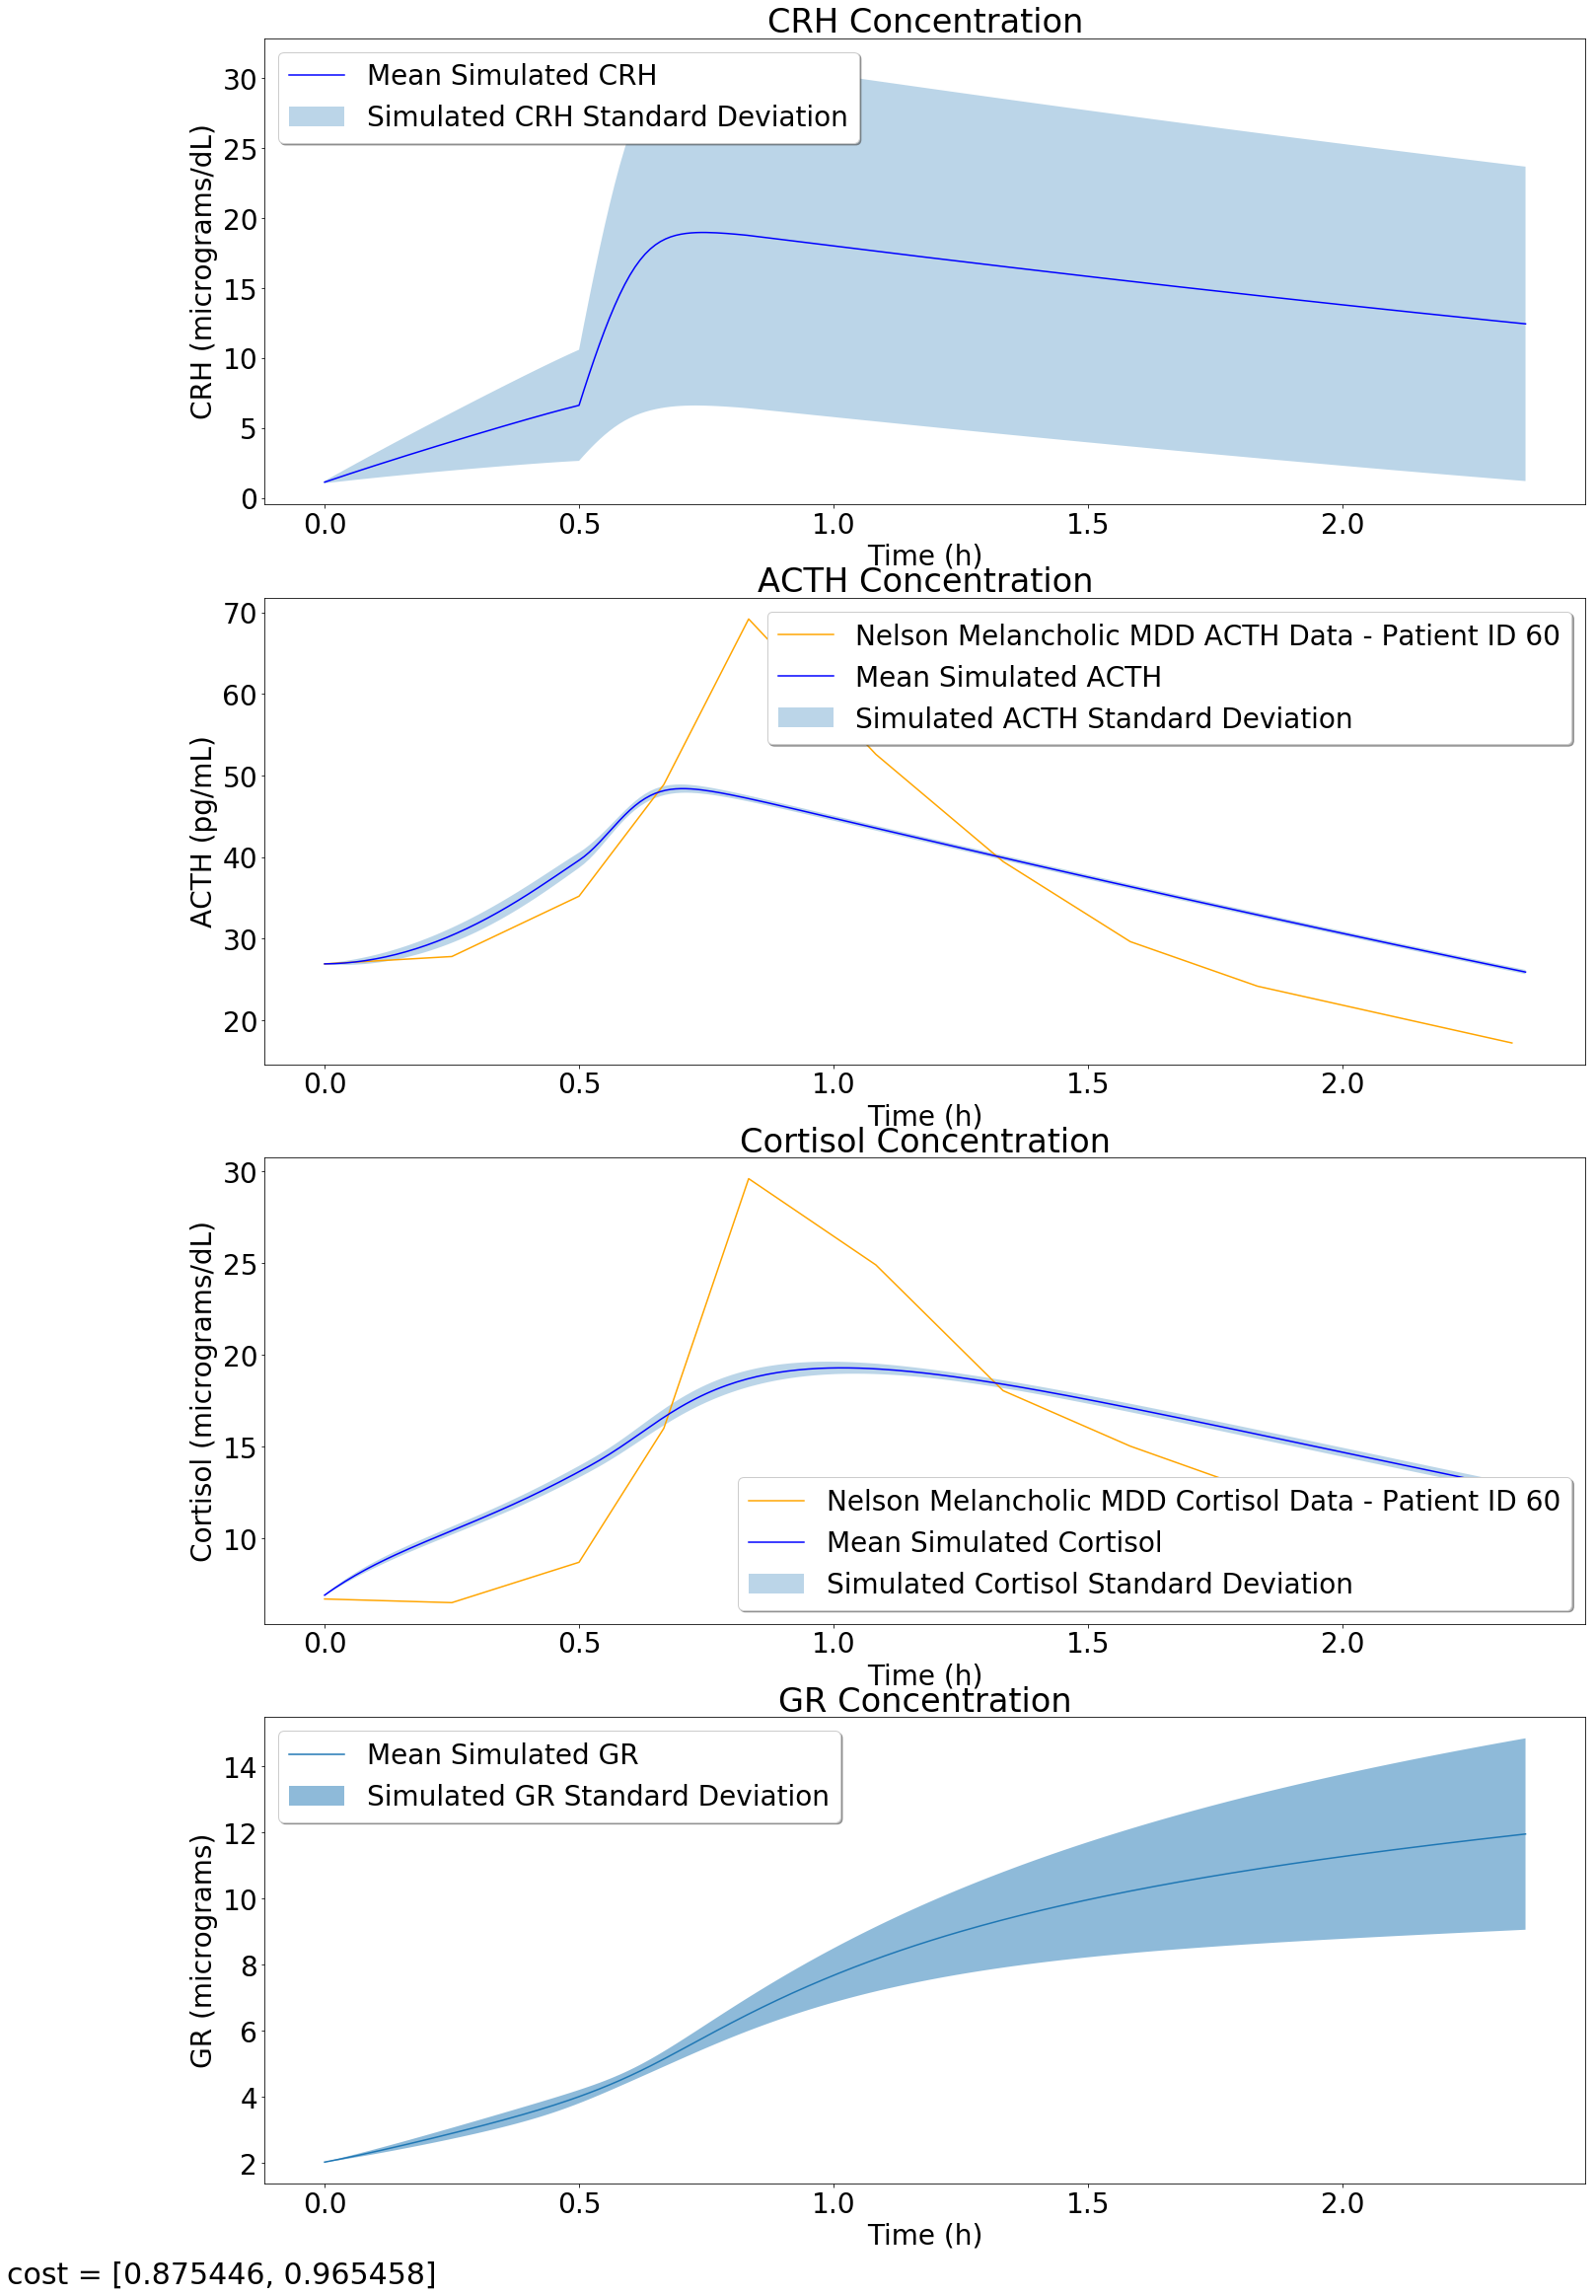

In [276]:
%matplotlib inline
# plot of raw data with simulation data for cortisol, then just simulation data for crh and acth

matplotlib.rc('font', **{'size'   : 28})

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(24,40))

# for only 1 iteration, uncomment below and comment the following line
#ax1.plot(optimizedSimData[:,0], sims_crh, label = "Mean Simulated CRH")
ax1.plot(optimizedSimData[:,0], np.mean(sims_crh, axis = 1), label = "Mean Simulated CRH", color = "blue")
ax1.fill_between(optimizedSimData[:,0], np.mean(sims_crh, axis = 1) - np.std(sims_crh, axis = 1), np.mean(sims_crh, axis = 1) + np.std(sims_crh, axis = 1), alpha = 0.3, label = "Simulated CRH Standard Deviation")
ax1.legend(loc = "upper left", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (h)", ylabel = "CRH (micrograms/dL)", title = "CRH Concentration")

# change this line when you change which data set you are matching
ax2.plot(nelsonACTH[:,0], nelsonMelancholicACTH[:,0], label = "Nelson Melancholic MDD ACTH Data - Patient ID 3", color = "orange")

# for only 1 iteration, uncomment below and comment the following line
#ax2.plot(optimizedSimData[:,0], sims_acth, label = "Mean")
ax2.plot(optimizedSimData[:,0], np.mean(sims_acth, axis = 1), label = "Mean Simulated ACTH", color = "blue")
ax2.fill_between(optimizedSimData[:,0], np.mean(sims_acth, axis = 1) - np.std(sims_acth, axis = 1), np.mean(sims_acth, axis = 1) + np.std(sims_acth, axis = 1), alpha = 0.3, label = "Simulated ACTH Standard Deviation")
ax2.legend(loc = "upper right", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (h)", ylabel = "ACTH (pg/mL)", title = "ACTH Concentration")

# change this line when you change which data set you are matching
ax3.plot(nelsonCortisol[:,0], nelsonMelancholicCortisol[:,0], label = "Nelson Melancholic MDD Cortisol Data - Patient ID 3", color = "orange")

# for only 1 iteration, uncomment below and comment the following line
#ax3.plot(optimizedSimData[:,0], sims_cort, label = "Simulation Mean")
ax3.plot(optimizedSimData[:,0], np.mean(sims_cort, axis = 1), label = "Mean Simulated Cortisol", color = "blue")
ax3.fill_between(optimizedSimData[:,0], np.mean(sims_cort, axis = 1) - np.std(sims_cort, axis = 1), np.mean(sims_cort, axis = 1) + np.std(sims_cort, axis = 1), alpha = 0.3, label = "Simulated Cortisol Standard Deviation")
ax3.legend(loc = "lower right", shadow = True, fancybox = True)
ax3.set(xlabel = "Time (h)", ylabel = "Cortisol (micrograms/dL)", title = "Cortisol Concentration")

# for only 1 iteration, uncomment below and comment the following line
#ax4.plot(optimizedSimData[:,0], sims_gr, label = "Mean")
ax4.plot(optimizedSimData[:,0], np.mean(sims_gr, axis = 1), label = "Mean Simulated GR")
ax4.fill_between(optimizedSimData[:,0], np.mean(sims_gr, axis = 1) - np.std(sims_gr, axis = 1), np.mean(sims_gr, axis = 1) + np.std(sims_gr, axis = 1), alpha = 0.5, label = "Simulated GR Standard Deviation")
ax4.legend(loc = "upper left", shadow = True, fancybox = True)
ax4.set(xlabel = "Time (h)", ylabel = "GR (micrograms)", title = "GR Concentration")

# uncomment the next two lines and enter the cost value range you got to have it reported at the bottom of the figure
#txt = "cost = []"
#plt.figtext(0.1, 0.09, txt, wrap = True, horizontalalignment = 'center', fontsize = 30)

# save the figure to a PNG file
plt.savefig("sriramModel_output/sriramModel-nelson-melancholic-patientID_3-5-iterations-all-params-normalizedCost.png", dpi = 300)


## Figure 3 Reproduction <a name="fig3"></a>

In [66]:
# initialize parameter values that stay the same between all three groups
#     These are the optimized values that the authors got from SensSB toolbox

k_stress = 10.1
k_i = 1.51
V_S3 = 3.25
K_m1 = 1.74
K_P2 = 8.3
V_S4 = 0.907
K_m2 = 0.112
K_P3 = 0.945
V_S5 = 0.00535
K_m3 = 0.0768
K_d1 = 0.00379
K_d2 = 0.00916
K_d3 = 0.356
n1 = 5.43
n2 = 5.1
K_b = 0.0202
G_tot = 3.28
V_S2 = 0.0509
K1 = 0.645
K_d5 = 0.0854
p_stress = 1

authors_params_control = [k_stress, k_i, V_S3, K_m1, K_P2, V_S4, K_m2, K_P3, V_S5, K_m3, K_d1, K_d2, K_d3, n1, n2, K_b, G_tot, V_S2, K1, K_d5, p_stress]

In [67]:
# initialize parameter values that stay the same between all three groups
#     These are the optimized values that the authors got from SensSB toolbox

k_stress = 13.7
k_i = 1.6
V_S3 = 3.25
K_m1 = 1.74
K_P2 = 8.3
V_S4 = 0.907
K_m2 = 0.112
K_P3 = 0.945
V_S5 = 0.00535
K_m3 = 0.0768
K_d1 = 0.00379
K_d2 = 0.00916
K_d3 = 0.356
n1 = 5.43
n2 = 5.1
K_b = 0.0202
G_tot = 3.28
V_S2 = 0.0509
K1 = 0.645
K_d5 = 0.0854
p_stress = 1

authors_params_depressed = [k_stress, k_i, V_S3, K_m1, K_P2, V_S4, K_m2, K_P3, V_S5, K_m3, K_d1, K_d2, K_d3, n1, n2, K_b, G_tot, V_S2, K1, K_d5, p_stress]

In [68]:
# initialize parameter values that stay the same between all three groups
#     These are the optimized values that the authors got from SensSB toolbox

k_stress = 17.5
k_i = 1.17
V_S3 = 3.25
K_m1 = 1.74
K_P2 = 8.3
V_S4 = 0.907
K_m2 = 0.112
K_P3 = 0.945
V_S5 = 0.00535
K_m3 = 0.0768
K_d1 = 0.00379
K_d2 = 0.00916
K_d3 = 0.356
n1 = 5.43
n2 = 5.1
K_b = 0.0202
G_tot = 3.28
V_S2 = 0.0509
K1 = 0.645
K_d5 = 0.0854
p_stress = 1

authors_params_ptsd = [k_stress, k_i, V_S3, K_m1, K_P2, V_S4, K_m2, K_P3, V_S5, K_m3, K_d1, K_d2, K_d3, n1, n2, K_b, G_tot, V_S2, K1, K_d5, p_stress]

In [69]:
y0_control = [1, 5, 5, 2]
y0_depressed = [1, 5, 5, 2]
y0_ptsd = [1, 5, 5, 2]

t_start = -0.01
t_end = 300.01
t_step = 0.01

In [72]:
%%time

no_opt_control = model(authors_params_control, y0_control)
no_opt_depressed = model(authors_params_depressed, y0_depressed)
no_opt_ptsd = model(authors_params_ptsd, y0_ptsd)

sims_gr_control = no_opt_control[:,4]
sims_cort_control = no_opt_control[:,3]
sims_acth_control = no_opt_control[:,2]
sims_crh_control = no_opt_control[:,1]

sims_gr_depressed = no_opt_depressed[:,4]
sims_cort_depressed = no_opt_depressed[:,3]
sims_acth_depressed = no_opt_depressed[:,2]
sims_crh_depressed = no_opt_depressed[:,1]

sims_gr_ptsd = no_opt_ptsd[:,4]
sims_cort_ptsd = no_opt_ptsd[:,3]
sims_acth_ptsd = no_opt_ptsd[:,2]
sims_crh_ptsd = no_opt_ptsd[:,1]

CPU times: user 844 ms, sys: 25.8 ms, total: 870 ms
Wall time: 868 ms


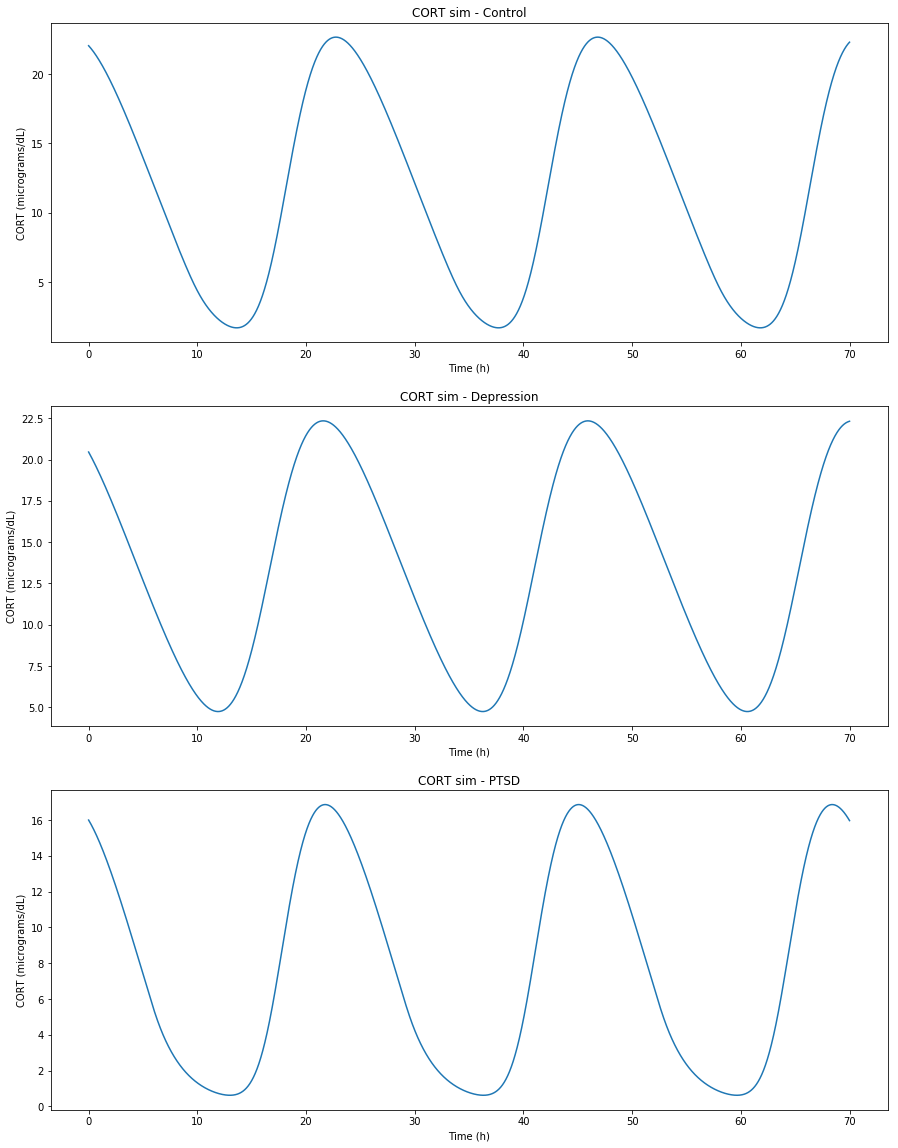

In [73]:
%matplotlib inline
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15,20))

ax1.plot(np.arange(0, 70, 0.01), sims_cort_control[-7800:-800], label = "CORT sim - Control")
ax1.set(ylabel = "CORT (micrograms/dL)", xlabel = "Time (h)", title = "CORT sim - Control")
#ax1.legend(loc = "upper right", shadow = True, fancybox = True)

ax2.plot(np.arange(0, 70, 0.01), sims_cort_depressed[-8800:-1800], label = "CORT sim - Depression")
ax2.set(ylabel = "CORT (micrograms/dL)", xlabel = "Time (h)", title = "CORT sim - Depression")
#ax2.legend(loc = "upper right", shadow = True, fancybox = True)

ax3.plot(np.arange(0, 70, 0.01), sims_cort_ptsd[-9100:-2100], label = "CORT sim - PTSD")
ax3.set(ylabel = "CORT (micrograms/dL)", xlabel = "Time (h)", title = "CORT sim - PTSD")
#ax3.legend(loc = "upper right", shadow = True, fancybox = True)

plt.savefig("sriramModel_output/sriramModel-figure3-reproduction.png", dpi=300)

## Figure 4 Reproduction <a name="fig4"></a>

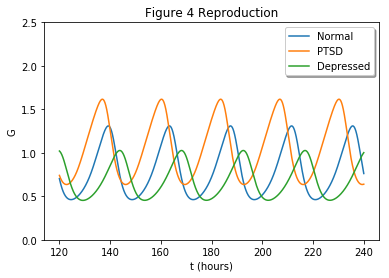

In [74]:
# create Fig 4 of free glucocorticoid receptor level
t_end = 240.01

normal = model(authors_params_control, y0)
PTSD = model(authors_params_ptsd, y0)
depressed = model(authors_params_depressed, y0)

G_normal = G_tot - normal[:,4]
G_PTSD = G_tot - PTSD[:,4]
G_depressed = G_tot - depressed[:,4]

plt.plot(normal[-12000:,0], G_normal[-12000:], label='Normal')
plt.plot(PTSD[-12000:,0], G_PTSD[-12000:], label='PTSD')
plt.plot(depressed[-12000:,0], G_depressed[-12000:], label='Depressed')
plt.ylim(0,2.5)
plt.xlabel('t (hours)')
plt.ylabel('G')
plt.title("Figure 4 Reproduction")
plt.legend(loc = "upper right", shadow = True, fancybox = True)
plt.savefig("sriramModel_output/sriramModel-figure4-reproduction.png", dpi=300)

## Load Parameter Sets, Run Model and Save Hormone Concentration Data <a name="loadparams"></a>

In [58]:
loaded_params = np.genfromtxt("sriram-opt-pars-carrollControl-rearr-1-all-params-expanded-bounds.txt")
y0 = np.genfromtxt("sriram-y0-carrollControl-rearr-1-all-params-expanded-bounds.txt")
bounds = np.genfromtxt("sriram-bounds-carrollControl-rearr-1-all-params-expanded-bounds.txt")

In [59]:
# if loading only a single iteration
loaded_params = loaded_params[1:]

# if loading multiple iterations
#loaded_params = loaded_params[1:,:]

In [ ]:
# alternatively, you can set the parameters yourself in the 
#  Parameters and Initial Conditions section and then 
#  uncomment & run this cell
#loaded_params = authors_params

In [60]:
# plug the optimized parameters into the solver
optimizedSimData = model(loaded_params, y0)
    
# save CRH, cortisol and ACTH data into sims arrays
sims_gr = optimizedSimData[:,4]
sims_cort = optimizedSimData[:,3]
sims_acth = optimizedSimData[:,2]
sims_crh = optimizedSimData[:,1]

### Checking Parameter Sets Generated Externally <a name="checkexternal"></a>

In [98]:
cort_data = np.zeros((2403,len(loaded_params)))
for i in range(len(loaded_params)):
    cort_data[:,i] = np.transpose(np.hstack((i+1,model(loaded_params[i,1:], y0)[:,3])))

In [100]:
time_data = np.zeros((2403,len(loaded_params)))
for i in range(len(loaded_params)):
    time_data[:,i] = np.transpose(np.hstack((i+1,model(loaded_params[i,1:], y0)[:,0])))

In [102]:
np.savetxt("sriram-cort-data-yehudaControl-1000-all-params.txt", cort_data)

In [103]:
np.savetxt("sriram-time-data-yehudaControl-1000-all-params.txt", time_data)

In [725]:
sim = model(yin_params[next_max,1:], y0)

In [814]:
sim = model(testing_params, y0)

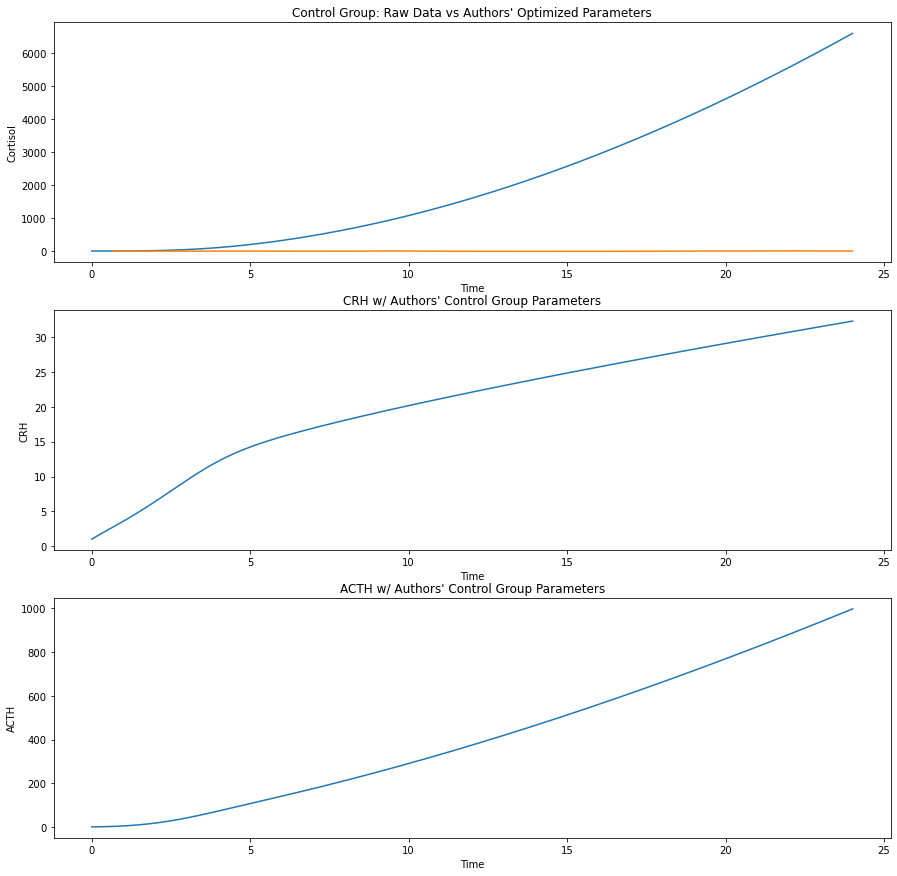

In [816]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize = (15,15))
ax1.plot(sim[:,0], sim[:,3], label = "Simulation")
ax1.plot(yehudaControlCortisol[:,0], yehudaControlCortisol[:,1], label = "Yehuda Control Group")
ax1.set(xlabel = "Time", ylabel = "Cortisol", title = "Control Group: Raw Data vs Authors' Optimized Parameters")
ax2.plot(sim[:,0], sim[:,1])
ax2.set(xlabel = "Time", ylabel = "CRH", title = "CRH w/ Authors' Control Group Parameters")
ax3.plot(sim[:,0], sim[:,2])
ax3.set(xlabel = "Time", ylabel = "ACTH", title = "ACTH w/ Authors' Control Group Parameters")

plt.savefig("testing-params-kb-0.01.pdf", dpi = 300)

## Load Simulated Concentration Data from Files and Plot <a name="load-and-plot"></a>

In [456]:
sims_t = np.genfromtxt('sriramModel_output/sriramModel-nelson-atypical-patientID_19-timeSteps-5-iterations.txt')
sims_gr = np.genfromtxt('sriramModel_output/sriramModel-nelson-atypical-patientID_19-sims-gr-5-iterations.txt')
sims_cort = np.genfromtxt('sriramModel_output/sriramModel-nelson-atypical-patientID_19-sims-cort-5-iterations.txt')
sims_crh = np.genfromtxt('sriramModel_output/sriramModel-nelson-atypical-patientID_19-sims-crh-5-iterations.txt')
sims_acth = np.genfromtxt('sriramModel_output/sriramModel-nelson-atypical-patientID_19-sims-acth-5-iterations.txt')

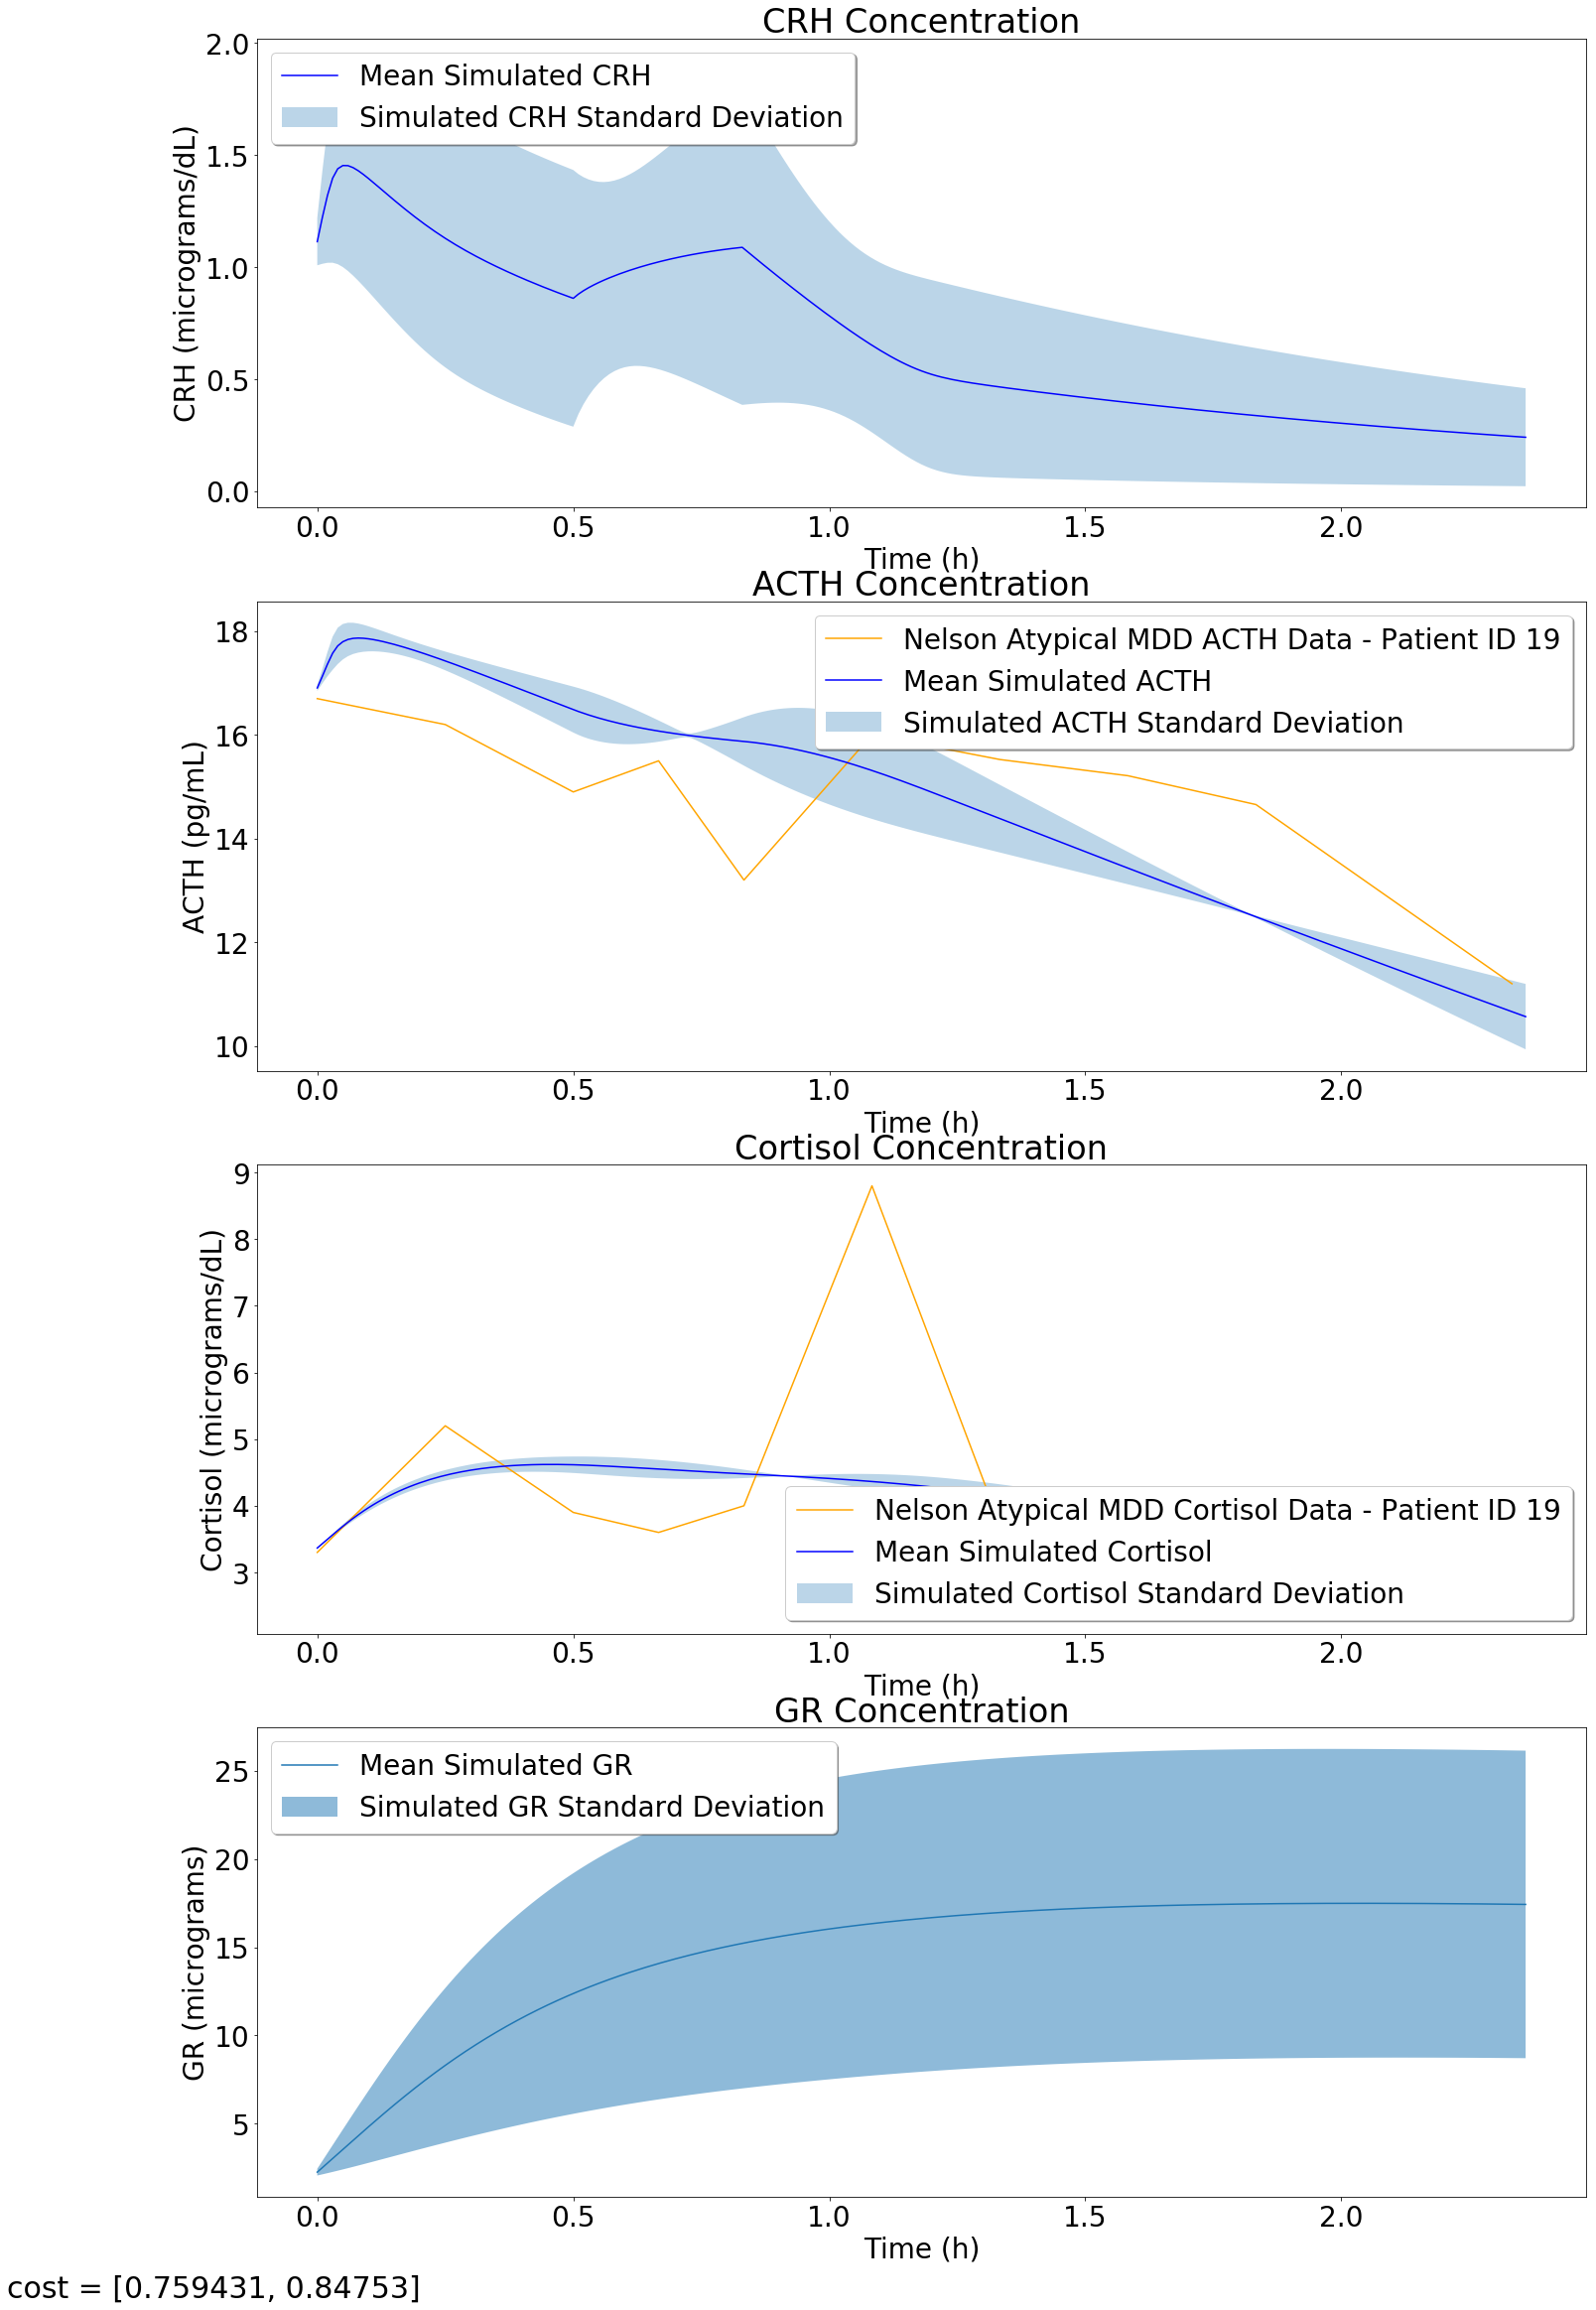

In [457]:
%matplotlib inline
# plot of raw data with simulation data for cortisol, then just simulation data for crh and acth

matplotlib.rc('font', **{'size'   : 28})

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize=(24,40))

#ax1.plot(optimizedSimData[:,0], sims_crh, label = "Mean Simulated CRH")
# for more than 1 iteration, uncomment below
ax1.plot(sims_t, np.mean(sims_crh, axis = 1), label = "Mean Simulated CRH", color = "blue")
ax1.fill_between(sims_t, np.mean(sims_crh, axis = 1) - np.std(sims_crh, axis = 1), np.mean(sims_crh, axis = 1) + np.std(sims_crh, axis = 1), alpha = 0.3, label = "Simulated CRH Standard Deviation")
ax1.legend(loc = "upper left", shadow = True, fancybox = True)
ax1.set(xlabel = "Time (h)", ylabel = "CRH (micrograms/dL)", title = "CRH Concentration")

#ax2.plot(optimizedSimData[:,0], sims_acth, label = "Mean")
ax2.plot(nelsonACTH[:,0], nelsonAtypicalACTH[:,5], label = "Nelson Atypical MDD ACTH Data - Patient ID 19", color = "orange")
# for more than 1 iteration, uncomment below
ax2.plot(sims_t, np.mean(sims_acth, axis = 1), label = "Mean Simulated ACTH", color = "blue")
ax2.fill_between(sims_t, np.mean(sims_acth, axis = 1) - np.std(sims_acth, axis = 1), np.mean(sims_acth, axis = 1) + np.std(sims_acth, axis = 1), alpha = 0.3, label = "Simulated ACTH Standard Deviation")
ax2.legend(loc = "upper right", shadow = True, fancybox = True)
ax2.set(xlabel = "Time (h)", ylabel = "ACTH (pg/mL)", title = "ACTH Concentration")

#ax3.plot(optimizedSimData[:,0], sims_cort, label = "Simulation Mean")
ax3.plot(nelsonCortisol[:,0], nelsonAtypicalCortisol[:,5], label = "Nelson Atypical MDD Cortisol Data - Patient ID 19", color = "orange")
# for more than 1 iteration, uncomment below
ax3.plot(sims_t, np.mean(sims_cort, axis = 1), label = "Mean Simulated Cortisol", color = "blue")
ax3.fill_between(sims_t, np.mean(sims_cort, axis = 1) - np.std(sims_cort, axis = 1), np.mean(sims_cort, axis = 1) + np.std(sims_cort, axis = 1), alpha = 0.3, label = "Simulated Cortisol Standard Deviation")
ax3.legend(loc = "lower right", shadow = True, fancybox = True)
ax3.set(xlabel = "Time (h)", ylabel = "Cortisol (micrograms/dL)", title = "Cortisol Concentration")

#ax4.plot(optimizedSimData[:,0], sims_gr, label = "Mean")
# for more than 1 iteration, uncomment below
ax4.plot(sims_t, np.mean(sims_gr, axis = 1), label = "Mean Simulated GR")
ax4.fill_between(sims_t, np.mean(sims_gr, axis = 1) - np.std(sims_gr, axis = 1), np.mean(sims_gr, axis = 1) + np.std(sims_gr, axis = 1), alpha = 0.5, label = "Simulated GR Standard Deviation")
ax4.legend(loc = "upper left", shadow = True, fancybox = True)
ax4.set(xlabel = "Time (h)", ylabel = "GR (micrograms)", title = "GR Concentration")

txt = "cost = [0.759431, 0.84753]"
plt.figtext(0.1, 0.09, txt, wrap = True, horizontalalignment = 'center', fontsize = 30)
#plt.savefig("sriramModel-nelson-atypical-patientID_1-5-iterations-all-params-normalizedCost.png", dpi = 300)
# include p_stress in filename to indicate that we used stress_input function
plt.savefig("sriramModel_output/sriramModel-nelson-atypical-patientID_19-5-iterations-all-params-normalizedCost.png", dpi = 300)


## Dependencies <a name="dependencies"></a>

In [2]:
%load_ext watermark

In [4]:
%watermark --iversions

numpy     : 1.21.5
matplotlib: 3.0.1
pandas    : 0.23.4
mpld3     : 0.3.1.dev1
scipy     : 1.1.0

